# <span style="color:#FA8072"> Bellabeat Case Study </span>

![Bellabeat logo](https://upload.wikimedia.org/wikipedia/en/1/1d/Bellabeat_logo.webp)

# <span style="color:#FA8072"> Table of Contents </span>

* [1. Introduction](#introduction_1)
* [2. Ask](#ask_2)
* [3. Prepare](#prepare_3)
* [4. Process](#process_4)
    * [4.1 Installing packages and opening libraries](#installing_packages_and_opening_libraries_4_1)
    * [4.2 Importing datasets](#importing_datasets_4_2)
    * [4.3 Merging months datasets](#merging_months_datasets_4_3)
    * [4.4 Previewing our datasets](#previewing_our_datasets_4_4)
    * [4.5 Cleaning data](#cleaning_data_4_5)
* [5. Analyze](#analyze_phase_5)
    * [5.1 Sorting active users by device usage](#sorting_active_users_by_device_usage)
    * [5.2 Number of steps](#number_of_steps)
    * [5.3 Number of steps by user usage type](#steps_by_usage)
    * [5.4 Grouping by number of steps](#grouping_steps)
    * [5.5 Segmenting grouped number of steps by user usage type](#steps_by_usage)
    * [5.6 Total steps vs calories](#steps_vs_calories)
    * [5.7 Relationship between steps and calories by time of day](#steps_calories_by_time_of_day)
    * [5.8 Segmenting steps and calories by time of day and by user usage type](#steps_calories_by_time_of_day_usage)
    * [5.9 BMI levels](#bmi_levels)
    * [5.10 BMI levels vs usage type](#bmi_levels_usage)
    * [5.11 BMI vs average steps](#bmi_average_steps)
    * [5.12 Exploring the sleeping time table](#sleeping_time)
    * [5.13 Sedentary time vs asleep time](#sedentary_asleep_time)
    * [5.14 How well users slept](#how_well_users_slept)
    * [5.15 BMI levels vs time asleep](#bmi_vs_asleep)
    * [5.16 Steps and time asleep per day of the week](#steps_asleep_day_of_the_week)
* [6. Insights](#insights)
* [7. Recommendations](#recommendations)
    
# <span style="color:#FA8072"> 1. Introduction </span> <a class="anchor" id="introduction_1"></a>

In the capstone project of the Google Data Analytics Professional Certificate course on Coursera, a case study is presented for performing data analyst work for the fictional company Bellabeat.

- Scenario:

Bellabeat is a high-tech manufacturer of health-focused products for women. Its app and smart devices provide users with insights into their daily well-being and health, including physical activity, sleep, stress, menstrual cycle, water intake, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions, including personalized guidance based on their lifestyle and goals through its membership service. 

Their products portfolio includes: 

- Bellabeat app: provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits and connects with the smart devices.
- Leaf: classic wellness tracker can be worn as a bracelet, necklace, or clip.
- Time: wellness watch.
- Spring: a water bottle that tracks daily water intake using smart technology .
- Bellabeat membership: gives users 24/7 access to fully personalized guidance.

I was asked to analyze the Fitbit dataset to find patterns and insights that could help inform decisions about Bellabeat's marketing and product strategy.

After the analysis, recommendations were presented to the company: segment customers further and identify patterns, crossing different categorizations, invest in increasing the time of use of smart devices with incentives and new features, with personalized reports and content, social and gamification elements, suggestions for tours in the users' region, and creation of tools to help customers improve their sleep.

![woman practicing physical activity](https://images.pexels.com/photos/8567597/pexels-photo-8567597.jpeg)

# <span style="color:#FA8072">  2. Ask </span>  <a class="anchor" id="ask_2"></a>

The cofounder and Chief Creative Officer believes that analyzing the data related to Bellabeat’s smart devices will help the company gain insights for future marketing campaigns. As a data analyst, I will analyze the historical data from the smartwatches of about 30 users over a two-month period. Through this analysis, I will be able to find user profile characteristics and usage trends that will serve as the basis for more targeted marketing campaigns and increase user identification with the brand.

# <span style="color:#FA8072"> 3. Prepare </span> <a class="anchor" id="prepare_3"></a> 

**Data Location**: The FitBit Fitness Tracker dataset (CC0: Public Domain) will be used for this analysis, available on [Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit).

**Data Organization**: The dataset was generated by approximately 30 FitBit users who responded to a distributed survey via Amazon Mechanical Turk between 03.12.2016 - 05.12.2016. It is organized into 11 and 18 tables for each month, containing comprehensive information on activity metrics, calories, steeps, BMI, heart rate and sleep records; in time frames of seconds, minutes, hours and days.

**Data Credibility & Bias**: Some data frames will not be used for analysis because there are more complete data frames with the same information, they are not consistent in the two months, there is too much information missing or the sample size is too small.

For the case study, I combined the datasets from the two months when possible to be able to analyze a larger time period. One dataset was not available in month 03, and when used, it was analyzed only in relation to the individual data from month 04, reducing the scope of the analysis.

Because the data is made available by a real technology wellness company, it is considered reliable. To maintain the anonymity of the service's customers, personal data such as customer information, age, gender, financial transactions and others are unavailable, which makes it impossible to perform deeper analyses on users, especially targeting the female audience.

Some datasets reduce the number of users by half, which is already not many, which hinders the analysis. Even so, with the objective of conducting the study, the sets were analyzed.

# <span style="color:#FA8072">  4. Process </span> <a class="anchor" id="process_4"></a> 

The tool chosen to clean, analyze and visualize the data was the R programming with RStudio.

The first step was to import all the CSV tables into RStudio.

### 4.1 Installing packages and opening libraries <a class="anchor" id="installing_packages_and_opening_libraries_4_1"></a> 

The following packages were used for our analysis: tidyverse, lubridate, scales, and ggpubr.

In [1]:
library(tidyverse)
library(lubridate)
library(scales)
library(ggpubr)
library(ggplot2)      

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### 4.2 Importing datasets <a class="anchor" id="importing_datasets_4_2"></a>

The following CSV files were imported into RStudio: dailyActivity_merged, hourlyCalories_merged, hourlySteps_merged, sleepDay_merged and weightLogInfo_merged.

The “sleepDay_merged” table is only available in month 04, so when used, it was only used with data related to that month.

In [2]:
#datasets 03 month
daily_activity_03 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
hourly_calories_03 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv")
hourly_steps_03 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv")
weight_log_info_03 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv")

#datasets 04 month
daily_activity_04 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories_04 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_steps_04 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep_day_04 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log_info_04 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

### 4.3 Merging months datasets <a class="anchor" id="merging_months_datasets_4_3"></a>
 
The first step in merging data from different months was to check whether the tables had the same column names.

In [3]:
names(daily_activity_03) == names(daily_activity_04)   
names(hourly_calories_03) == names(hourly_calories_04)
names(hourly_steps_03) == names(hourly_steps_04)
names(weight_log_info_03) == names(weight_log_info_04)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE

[1] TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

It was also checked how many different IDs there were in each table.

In [4]:
#03
n_distinct(daily_activity_03$Id)
n_distinct(hourly_calories_03$Id)
n_distinct(hourly_steps_03$Id)
n_distinct(weight_log_info_03$Id)
#04
n_distinct(daily_activity_04$Id)
n_distinct(hourly_calories_04$Id)
n_distinct(hourly_steps_04$Id)
n_distinct(weight_log_info_04$Id)
n_distinct(sleep_day_04$Id)

[1] 35

[1] 34

[1] 34

[1] 11

[1] 33

[1] 33

[1] 33

[1] 8

[1] 24

The weight tables for both months have a much lower number of users, so they will be analyzed separately from the other sets. The "sleep_day_04" table also has fewer IDs, containing only 24.

Then the tables for each month were merged into one.

In [5]:
daily_activity <- bind_rows(daily_activity_03, daily_activity_04)
hourly_calories <- bind_rows(hourly_calories_03, hourly_calories_04)
hourly_steps <- bind_rows(hourly_steps_03, hourly_steps_04)
weight <- bind_rows(weight_log_info_03, weight_log_info_04)

Checking whether any IDs were added after the merge.

In [6]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_steps$Id)
n_distinct(weight$Id)

[1] 35

[1] 35

[1] 35

[1] 13

After the merge, the weight table has 13 users while the other datasets have 35.

### 4.4 Previewing our datasets <a class="anchor" id="previewing_our_datasets_4_4"></a>


In [7]:
colnames(daily_activity)
colnames(hourly_calories)
colnames(hourly_steps)
colnames(weight)
colnames(sleep_day_04)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"           "ActivityHour" "Calories"

[1] "Id"           "ActivityHour" "StepTotal"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [8]:
str(daily_activity)
str(hourly_calories)
str(hourly_steps)
str(weight)
str(sleep_day_04)

'data.frame':	1397 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "3/25/2016" "3/26/2016" "3/27/2016" "3/28/2016" ...
 $ TotalSteps              : int  11004 17609 12736 13231 12041 10970 12256 12262 11248 10016 ...
 $ TotalDistance           : num  7.11 11.55 8.53 8.93 7.85 ...
 $ TrackerDistance         : num  7.11 11.55 8.53 8.93 7.85 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  2.57 6.92 4.66 3.19 2.16 ...
 $ ModeratelyActiveDistance: num  0.46 0.73 0.16 0.79 1.09 ...
 $ LightActiveDistance     : num  4.07 3.91 3.71 4.95 4.61 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  33 89 56 39 28 30 33 47 40 15 ...
 $ FairlyActiveMinutes     : int  12 17 5 20 28 13 12 21 11 30 ...
 $ LightlyActiveMinutes    : int  205 274 268 224 243 223 239 200 244 314 ...
 $ SedentaryMinutes        : int  804 588 605 1080

In [9]:
head(daily_activity)
head(hourly_calories)
head(hourly_steps)
head(weight)
head(sleep_day_04)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,3/12/2016 12:00:00 AM,48
2,1503960366,3/12/2016 1:00:00 AM,48
3,1503960366,3/12/2016 2:00:00 AM,48
4,1503960366,3/12/2016 3:00:00 AM,48
5,1503960366,3/12/2016 4:00:00 AM,48
6,1503960366,3/12/2016 5:00:00 AM,48


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,3/12/2016 12:00:00 AM,0
2,1503960366,3/12/2016 1:00:00 AM,0
3,1503960366,3/12/2016 2:00:00 AM,0
4,1503960366,3/12/2016 3:00:00 AM,0
5,1503960366,3/12/2016 4:00:00 AM,0
6,1503960366,3/12/2016 5:00:00 AM,0


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,4/5/2016 11:59:59 PM,53.3,117.5064,22,22.97,True,1.459901e+12
2,1927972279,4/10/2016 6:33:26 PM,129.6,285.7191,NA,46.17,False,1.460313e+12
3,2347167796,4/3/2016 11:59:59 PM,63.4,139.7731,10,24.77,True,1.459728e+12
4,2873212765,4/6/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.459987e+12
5,2873212765,4/7/2016 11:59:59 PM,57.2,126.1044,NA,21.65,True,1.460074e+12
6,2891001357,4/5/2016 11:59:59 PM,88.4,194.8886,NA,25.03,True,1.459901e+12


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


### 4.5 Data cleaning <a class="anchor" id="data_cleaning_4_5"></a>

Now that we know more about our data structures, let's process them to look for errors, missing values, and inconsistencies.

#### 4.5.1 Looking for duplicates

In [10]:
sum(duplicated(daily_activity))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_steps))
sum(duplicated(weight))
sum(duplicated(sleep_day_04))

[1] 0

[1] 175

[1] 175

[1] 2

[1] 3

#### 4.5.2 Checking results reported as duplicates

The data was checked to try to find any user or time pattern that was causing the duplicates before it was cleaned. Since no pattern was found, all data was deleted.


In [11]:
hourly_calories %>% 
  filter(duplicated(.))
duplicated_hourly_calories <- hourly_calories[duplicated(hourly_calories) | duplicated(hourly_calories, fromLast = TRUE), ]
head(duplicated_hourly_calories)

hourly_steps %>% 
  filter(duplicated(.))
duplicated_hourly_steps <- hourly_steps[duplicated(hourly_steps) | duplicated(hourly_steps, fromLast = TRUE), ]
head(duplicated_hourly_steps)

sleep_day_04 %>% 
  filter(duplicated(.))
sleep_day_04[duplicated(sleep_day_04) | duplicated(sleep_day_04, fromLast = TRUE), ]

Id,ActivityHour,Calories
<dbl>,<chr>,<int>
1624580081,4/12/2016 12:00:00 AM,55
1624580081,4/12/2016 1:00:00 AM,51
1624580081,4/12/2016 2:00:00 AM,50
1624580081,4/12/2016 3:00:00 AM,51
1624580081,4/12/2016 4:00:00 AM,50
1624580081,4/12/2016 5:00:00 AM,50
1624580081,4/12/2016 6:00:00 AM,50
1624580081,4/12/2016 7:00:00 AM,50
1624580081,4/12/2016 8:00:00 AM,51


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1489,1624580081,4/12/2016 12:00:00 AM,55
1490,1624580081,4/12/2016 1:00:00 AM,51
1491,1624580081,4/12/2016 2:00:00 AM,50
1492,1624580081,4/12/2016 3:00:00 AM,51
1493,1624580081,4/12/2016 4:00:00 AM,50
1494,1624580081,4/12/2016 5:00:00 AM,50


Id,ActivityHour,StepTotal
<dbl>,<chr>,<int>
1624580081,4/12/2016 12:00:00 AM,31
1624580081,4/12/2016 1:00:00 AM,0
1624580081,4/12/2016 2:00:00 AM,0
1624580081,4/12/2016 3:00:00 AM,7
1624580081,4/12/2016 4:00:00 AM,0
1624580081,4/12/2016 5:00:00 AM,0
1624580081,4/12/2016 6:00:00 AM,0
1624580081,4/12/2016 7:00:00 AM,0
1624580081,4/12/2016 8:00:00 AM,0


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1489,1624580081,4/12/2016 12:00:00 AM,31
1490,1624580081,4/12/2016 1:00:00 AM,0
1491,1624580081,4/12/2016 2:00:00 AM,0
1492,1624580081,4/12/2016 3:00:00 AM,7
1493,1624580081,4/12/2016 4:00:00 AM,0
1494,1624580081,4/12/2016 5:00:00 AM,0


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<int>,<int>,<int>
4388161847,5/5/2016 12:00:00 AM,1,471,495
4702921684,5/7/2016 12:00:00 AM,1,520,543
8378563200,4/25/2016 12:00:00 AM,1,388,402


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
162,4388161847,5/5/2016 12:00:00 AM,1,471,495
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
224,4702921684,5/7/2016 12:00:00 AM,1,520,543
380,8378563200,4/25/2016 12:00:00 AM,1,388,402
381,8378563200,4/25/2016 12:00:00 AM,1,388,402


#### 4.5.3 Removing duplicates

In [12]:
hourly_calories <- hourly_calories %>% distinct() 

hourly_steps <- hourly_steps %>% distinct() 

weight <- weight %>% distinct()

sleep_day_04 <- sleep_day_04 %>% distinct()

#### 4.5.4 Confirming that duplicates have been deleted

In [13]:
sum(duplicated(hourly_calories))
sum(duplicated(hourly_steps))
sum(duplicated(weight))
sum(duplicated(sleep_day_04))

[1] 0

[1] 0

[1] 0

[1] 0

#### 4.5.5 Formatting date and time columns

Some tables had different date and time formats, these data were standardized, and for more accurate analysis of hour-by-hour data, "POSIXt" was used. The names of date columns were also standardized to facilitate future merges.

In [14]:
daily_activity <- daily_activity %>% 
  rename(date = ActivityDate) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y"))

weight <- weight %>% 
  rename(date = Date) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p"))

hourly_calories <- hourly_calories %>% 
  rename(date = ActivityHour) %>% 
  mutate(date = as.POSIXct(date, format = "%m/%d/%Y %I:%M:%S %p"))

hourly_steps <- hourly_steps %>% 
  rename(date = ActivityHour) %>% 
  mutate(date = as.POSIXct(date, format = "%m/%d/%Y %I:%M:%S %p"))

sleep_day_04 <- sleep_day_04 %>% 
  rename(date = SleepDay) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p"))

daily_activity_04 <- daily_activity_04 %>% 
  rename(date = ActivityDate) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y"))

Checking date format

In [15]:
class(daily_activity$date)
class(hourly_calories$date)
class(hourly_steps$date)
class(weight$date)
class(sleep_day_04$date)

[1] "Date"

[1] "POSIXct" "POSIXt"

[1] "POSIXct" "POSIXt"

[1] "Date"

[1] "Date"

#### 4.4.6 Checking if any minute asleep is greater than the time spent in bed

In [16]:
sleep_day_04 %>% filter(TotalTimeInBed < TotalMinutesAsleep)

Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<int>,<int>,<int>


# <span style="color:#FA8072"> 5. Analyze </span> <a class="anchor" id="analyze_5"></a>

We will analyze trends of the users of FitBit and determine if that can help us on BellaBeat's marketing strategy. 

 

In [17]:
daily_activity %>%  
  select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>%
  summary()

hourly_calories %>%  
  select(Calories) %>%
  summary()

hourly_steps %>%  
  select(StepTotal) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3146   1st Qu.: 2.170   1st Qu.: 729.0   1st Qu.:1799  
 Median : 6999   Median : 4.950   Median :1057.0   Median :2114  
 Mean   : 7281   Mean   : 5.219   Mean   : 992.5   Mean   :2266  
 3rd Qu.:10544   3rd Qu.: 7.500   3rd Qu.:1244.0   3rd Qu.:2770  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

    Calories     
 Min.   : 42.00  
 1st Qu.: 62.00  
 Median : 80.00  
 Mean   : 95.82  
 3rd Qu.:106.00  
 Max.   :948.00  

   StepTotal      
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   21.0  
 Mean   :  302.9  
 3rd Qu.:  323.0  
 Max.   :10565.0  

The average number of steps per user is lower than the recommended 7,500, while the ideal for greater benefits is 10,000 steps, which suggests that most users have a more sedentary routine.

The average number of sedentary minutes is 992 minutes, or 16 and a half hours, which is more than half the time in a day, and would be interesting to reduce.

The average human calorie expenditure is around 2,000 to 3,000 per day, and can be altered by many factors, including the intensity of physical activity. This number being closer to 2,000 suggests that users practice little physical activity.

In [18]:
daily_activity %>%  
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.0       Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.0       1st Qu.:111.0       
 Median :  2.00    Median :  6.0       Median :195.0       
 Mean   : 19.68    Mean   : 13.4       Mean   :185.4       
 3rd Qu.: 30.00    3rd Qu.: 18.0       3rd Qu.:262.0       
 Max.   :210.00    Max.   :660.0       Max.   :720.0       

Users' sedentary minutes are up to 9 times greater than their physical activity minutes.

The minimum recommended daily exercise time for a healthy routine is around 20 minutes. With an average of 19 minutes, users are at the minimum recommended limit.

In [19]:
weight %>%  
  select(WeightKg, Fat, BMI, IsManualReport) %>%
  summary()

    WeightKg           Fat             BMI        IsManualReport    
 Min.   : 52.60   Min.   :10.00   Min.   :21.45   Length:98         
 1st Qu.: 61.50   1st Qu.:19.00   1st Qu.:24.00   Class :character  
 Median : 62.50   Median :22.00   Median :24.39   Mode  :character  
 Mean   : 72.47   Mean   :19.75   Mean   :25.37                     
 3rd Qu.: 85.25   3rd Qu.:22.75   3rd Qu.:25.59                     
 Max.   :133.50   Max.   :25.00   Max.   :47.54                     
                  NA's   :94                                        

The ideal BMI percentage is around 18.5 and 25, while the average user is slightly above this number, but the 3rd Qu. is still 25.59, which indicates that the overall average is good and some overweight users increase the average.

In [20]:
sleep_day_04 %>%  
  select(TotalSleepRecords, TotalMinutesAsleep,  TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

The average number of hours of sleep is slightly less than 7 hours, at the minimum recommended limit.

### 5.1 Sorting active users by device usage <a class="anchor" id="sorting_active_users_by_device_usage"></a>

The first factor for classifying users was the number of days the smart device was used, using a valid day rule as a day with more than 100 steps recorded.

Users were grouped as follows:
- Low use - Between 1 and 20.
- Moderate use - Between 21 and 40.
- High use - Between 41 and 60. 

In [21]:
daily_usage <- daily_activity %>%
  filter(TotalSteps >100 ) %>% 
  group_by(Id) %>%
  summarize(ActivityDate=sum(n())) %>%
  mutate(usage_type = case_when(
    ActivityDate >= 1 & ActivityDate <= 20 ~ "Low Use",
    ActivityDate >= 21 & ActivityDate <= 40 ~ "Moderate Use", 
    ActivityDate >= 41 & ActivityDate <= 60 ~ "High Use")) %>% 
  mutate(usage_type = factor(usage_type, level = c('Low Use','Moderate Use','High Use'))) %>% 
  rename(days_used = ActivityDate) %>% 
  group_by(usage_type)

head(daily_usage)

Id,days_used,usage_type
<dbl>,<int>,<fct>
1503960366,49,High Use
1624580081,50,High Use
1644430081,40,Moderate Use
1844505072,26,Moderate Use
1927972279,28,Moderate Use
2022484408,43,High Use


For better understanding, the group values were converted into percentages.

In [22]:
daily_usage_percent <- daily_usage %>%
  count(usage_type) %>% 
  ungroup() %>%    
  mutate(
    #creating new columns for user type percentages
    total_percent = n / sum(n), 
    # transforming decimal into percentage
    labels = scales::percent(total_percent)
  )

head(daily_usage_percent)

usage_type,n,total_percent,labels
<fct>,<int>,<dbl>,<chr>
Low Use,3,0.08571429,8.6%
Moderate Use,17,0.48571429,48.6%
High Use,15,0.42857143,42.9%


Most users (17) use the smart device moderately, followed by high use users with 15, a good amount but could be increased, and lastly low use with 3.

Let's convert these numbers to a pie chart.

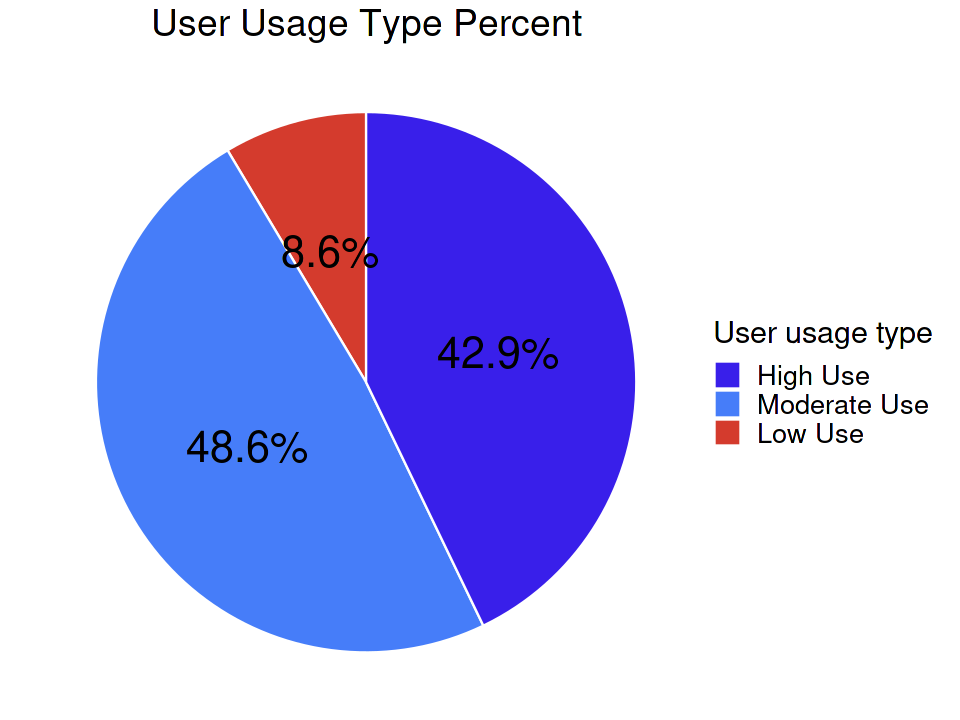

In [131]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(daily_usage_percent, aes(x = "", y = total_percent, fill = usage_type)) +
  geom_col(width = 11, color = "white") + 
  coord_polar(theta = "y") + 
  labs(title = "User Usage Type Percent", fill = "User usage type", x = NULL, y = NULL) + 
  theme_void() + 
  geom_text(aes(label = labels), 
            position = position_stack(vjust = 0.5), 
            size = 9, color = "black") + 
 scale_fill_manual(values = c("High Use" = "#391fea", "Moderate Use" = "#467df9", "Low Use" = "#d43b2d")) +
 theme(plot.title = element_text(size = 22, hjust = 0.5), legend.title = element_text(size = 18),
        legend.text = element_text(size = 16))

The chart shows us a good usage indicator, with only 8.6% of users showing low usage. Moderate and high usage numbers are close together.

Actions such as in-app push notifications and inbound marketing can be useful to increase the number of active days.

### 5.2 Number of steps <a class="anchor" id="number_of_steps"></a>

We want to know now what days of the week are the users more active and also what days of the week users sleep more. We will also verify if the users walk the recommended amount of steps and have the recommended amount of sleep. 

Below we are calculating the weekdays based on our column date. We are also calculating the average steps walked and minutes sleeped by weekday. 

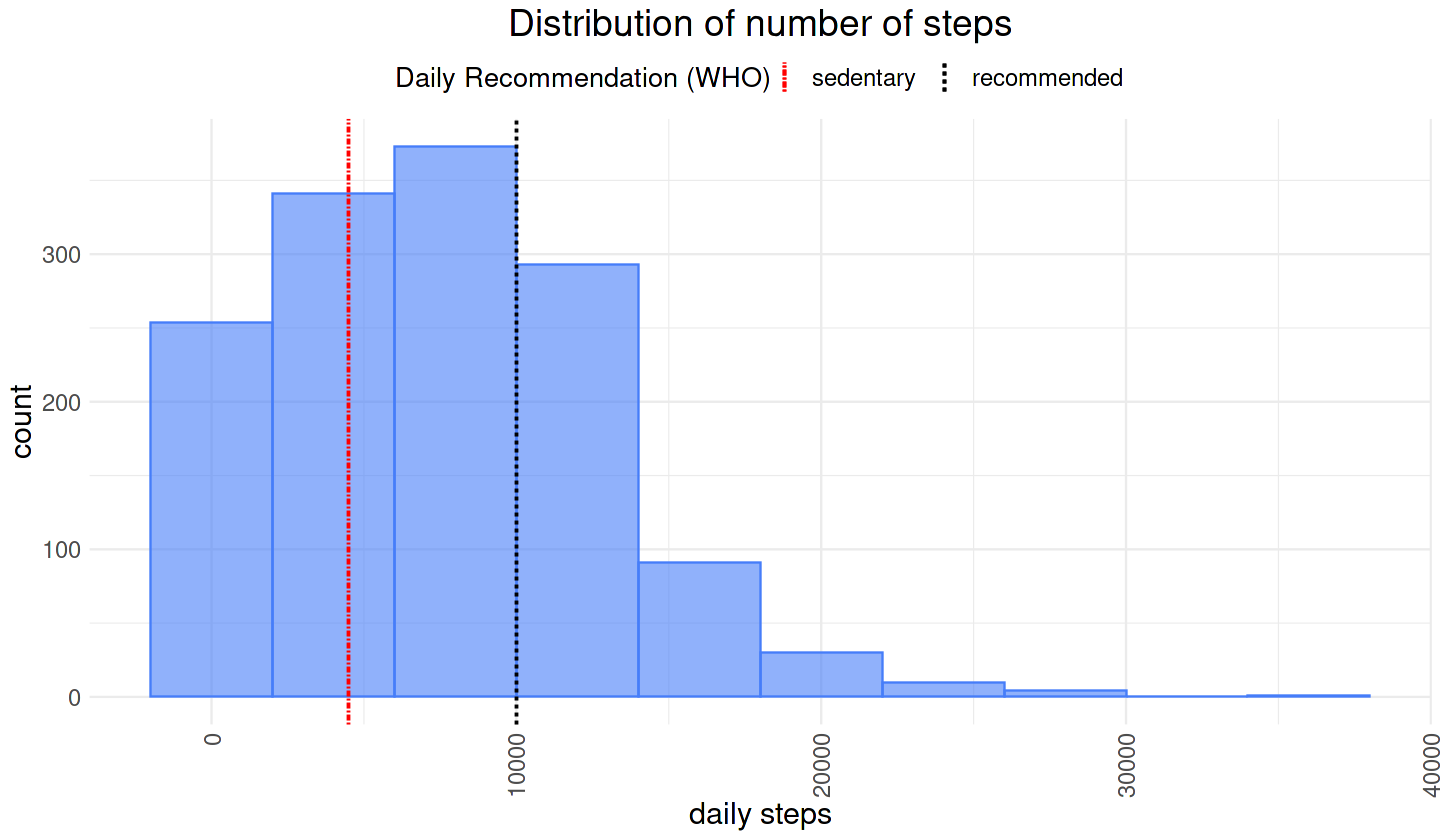

In [132]:
#making the chart
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(data = daily_activity) +
  geom_histogram(mapping = aes(x = TotalSteps), binwidth = 4000, color = "#467df9", fill = "#467df9", alpha = 0.6) + 
  geom_vline(aes(xintercept = 4500, color = "sedentary", linetype = "sedentary"), lwd = 0.8) +
  geom_vline(aes(xintercept = 10000, color = "recommended", linetype = "recommended"), lwd = 0.8) +
  labs(x = "daily steps", y = "count", title = "Distribution of number of steps") +
  scale_color_manual(name = "Daily Recommendation (WHO)", 
                     values = c("sedentary" = "red",
                                "recommended" = "black")) +
  scale_linetype_manual(name = "Daily Recommendation (WHO)", 
                        values = c("sedentary" = "twodash",
                                   "recommended" = "dashed")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 14),
        legend.position = "top",
        plot.title = element_text(size = 22, hjust = 0.5), 
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) 

According to recommendations for a healthy lifestyle, the minimum number of steps to stop being sedentary is 4,000 per day, and a considerable number do not even reach that point.

Most users do not exceed 10,000 steps per day, which would be ideal for having a healthy routine and reducing the risk of diseases. 

### 5.3 Number of steps by user usage type <a class="anchor" id="steps_by_usage"></a>

For a more in-depth analysis, let's segment the number of steps by the type of smart device usage.

In [40]:
#merging activity and usage tables
daily_activity_usage <- daily_activity %>%
  left_join(daily_usage, by = "Id")

Making the same previous segmented histogram

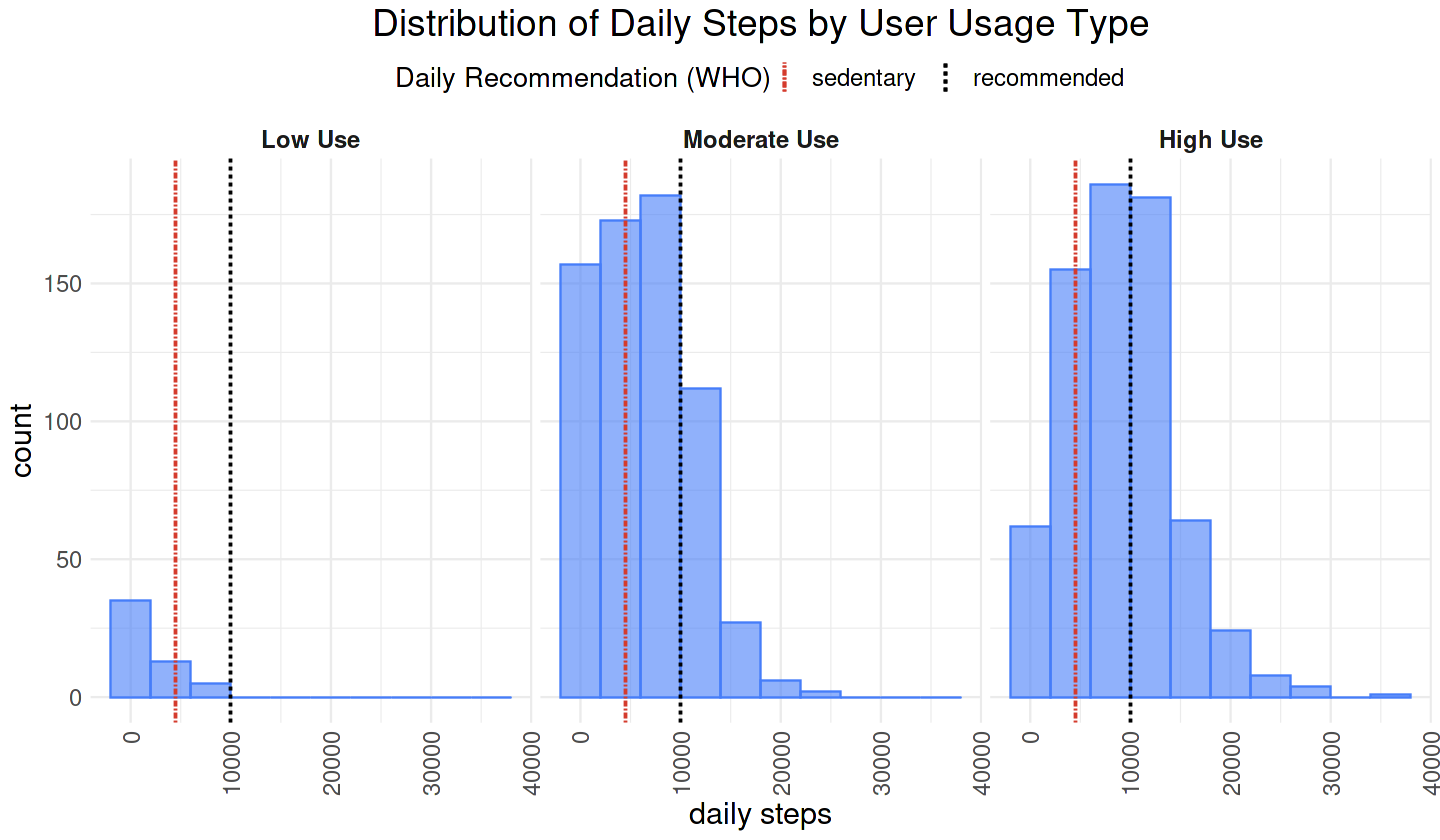

In [88]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(data = daily_activity_usage) +
  geom_histogram(mapping = aes(x = TotalSteps), binwidth = 4000, color = "#467df9", fill = "#467df9", alpha = 0.6) +
  geom_vline(aes(xintercept = 4500, color = "sedentary", linetype = "sedentary"), lwd = 0.8 ) +
  geom_vline(aes(xintercept = 10000, color = "recommended", linetype = "recommended"), lwd = 0.8) +
  labs(x = "daily steps", y = "count", title = "Distribution of Daily Steps by User Usage Type") +
  scale_color_manual(name = "Daily Recommendation (WHO)",
                     values = c("sedentary" = "#d43b2d",
                                "recommended" = "black")) +
  scale_linetype_manual(name = "Daily Recommendation (WHO)",
                        values = c("sedentary" = "twodash",
                                   "recommended" = "dashed")) +
  facet_wrap(~ usage_type) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 14),
        legend.position = "top",
        plot.title = element_text(size = 22, hjust = 0.5), 
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) 

High use users are the only ones who have a considerable number of steps above the recommended healthy number of steps.

Moderate use users have a constant number of steps until they reach 10 thousand, but then the values drop considerably.

Let's make a boxplot for deeper compreesion.

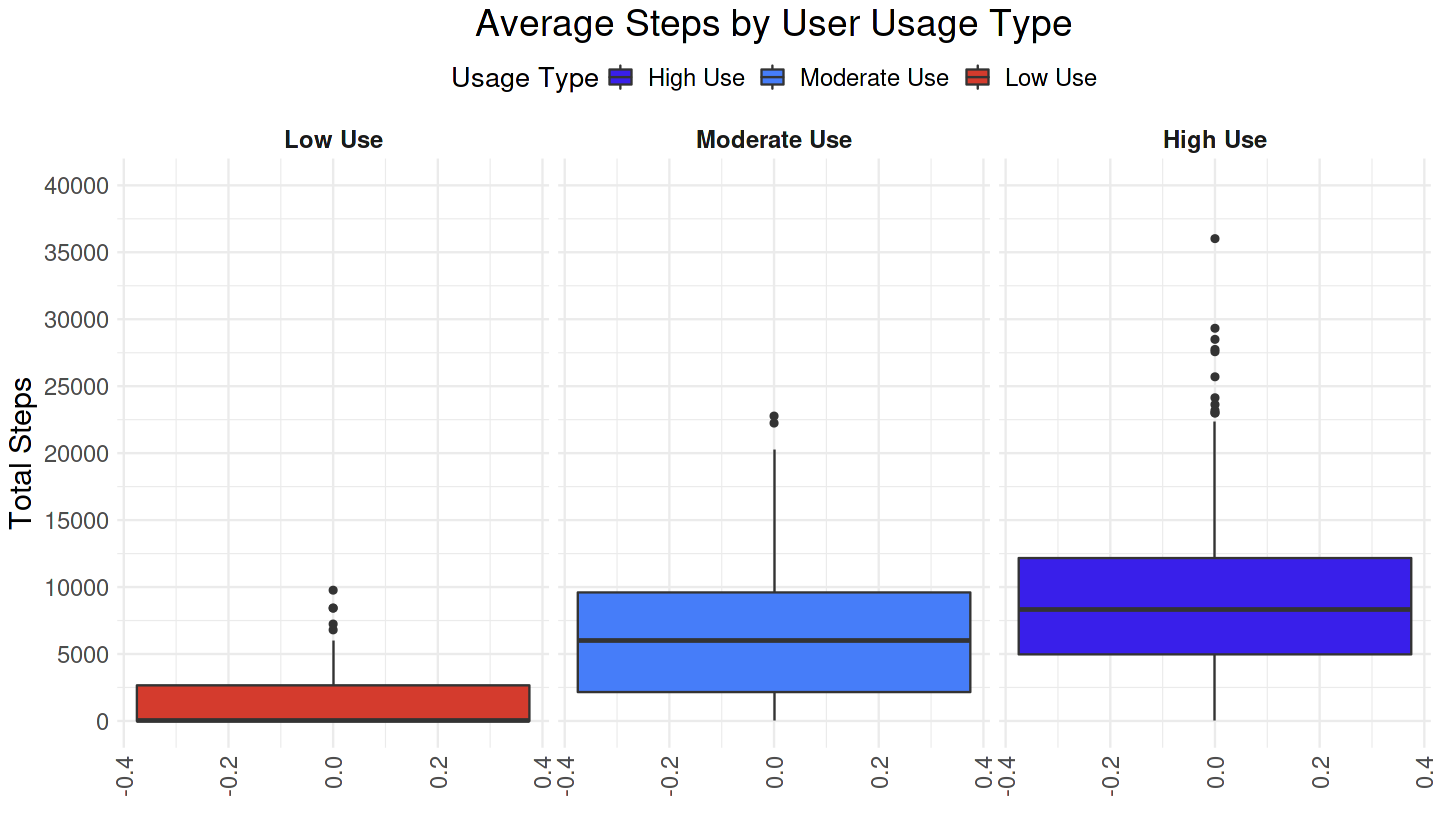

In [91]:
daily_activity_usage %>%
  ggplot(aes(x= , y= TotalSteps, fill= usage_type)) +
  geom_boxplot() +
  scale_y_continuous(limits=c(0,40000), breaks=seq(0,40000, by = 5000))+
  labs(title= ("Average Steps by User Usage Type"), x=" " , y="Total Steps")+
  theme(plot.title = element_text(size = 16),
        axis.text.y = element_text(size=10), 
        axis.text.x = element_blank(),axis.ticks.x=element_blank(),
        legend.title = element_text(size=12),
        legend.text = element_text(size=8))+
  facet_grid(~usage_type) +
  theme_minimal() +
  scale_fill_manual(name = "Usage Type",
                    values = c("High Use" = "#391fea", "Moderate Use" = "#467df9", "Low Use" = "#d43b2d")) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 14),
        legend.position = "top",
        plot.title = element_text(size = 22, hjust = 0.5), 
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) 

The average step taken increases across the usage groups.

High usage users are the only ones who have considerable values above 10 thousand steps. They are also the group that has very high values, above 35 thousand steps.

### 5.4 Grouping by number of steps <a class="anchor" id="grouping_steps"></a>

As discussed previously, there is a recommended number of steps for a healthy life. To understand the percentage of physical activity of users, the average number of steps per day will be calculated and grouped by 4 definitions of physical activity.

- Sedentary - Less than 4500 steps a day.
- Lightly active - Between 4500 and 7499 steps a day.
- Fairly active - Between 7500 and 9999 steps a day.
- Very active - More than 10000 steps a day.

The first step will be to find out the average of all types of user activity, add them up and find out the total average.

In [47]:
active_average <- daily_activity %>%
  group_by(Id) %>%
  summarise (mean_daily_steps = mean(TotalSteps), mean_daily_calories = mean(Calories))

head(active_average)

Id,mean_daily_steps,mean_daily_calories
<dbl>,<dbl>,<dbl>
1503960366,11935.780,1808.740
1624580081,5167.200,1433.780
1644430081,7780.925,2837.575
1844505072,2876.023,1585.326
1927972279,1269.070,2195.465
2022484408,11595.093,2500.302


In [48]:
#Segmenting users by total step count
user_active_type <- active_average %>%
  mutate(user_type = case_when(
    mean_daily_steps < 4500 ~ "sedentary",
    mean_daily_steps >= 4500 & mean_daily_steps < 7500 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 10000 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))

head(user_active_type)

Id,mean_daily_steps,mean_daily_calories,user_type
<dbl>,<dbl>,<dbl>,<chr>
1503960366,11935.780,1808.740,very active
1624580081,5167.200,1433.780,lightly active
1644430081,7780.925,2837.575,fairly active
1844505072,2876.023,1585.326,sedentary
1927972279,1269.070,2195.465,sedentary
2022484408,11595.093,2500.302,very active


Most users are lightly active, followed by sedentary and lastly very active, which indicates that most users do not practice physical activity constantly.

### 5.5 Segmenting grouped number of steps by user usage type <a class="anchor" id="steps_by_usage"></a> 

to have a more targeted view, the activity category will now be segmented by days used.

In [49]:
#merging tables
daily_active_type_usage <- user_active_type %>%
  left_join(daily_usage, by = "Id")

#converting quantity to porcentage
daily_active_use_piechart <- daily_active_type_usage %>%
  group_by(usage_type, user_type) %>%
  summarise(n_users = n(), .groups = "drop_last") %>% 
  mutate(
    total_in_facet = sum(n_users), 
    total_percent = n_users / total_in_facet, 
    labels = scales::percent(total_percent)
  ) %>%
  ungroup()

head(daily_active_use_piechart)

usage_type,user_type,n_users,total_in_facet,total_percent,labels
<fct>,<chr>,<int>,<int>,<dbl>,<chr>
Low Use,sedentary,3,3,1.00000000,100%
Moderate Use,fairly active,5,17,0.29411765,29.4%
Moderate Use,lightly active,6,17,0.35294118,35.3%
Moderate Use,sedentary,5,17,0.29411765,29.4%
Moderate Use,very active,1,17,0.05882353,5.9%
High Use,fairly active,3,15,0.20000000,20.0%


Let's make a pie chart for deeper understanding.

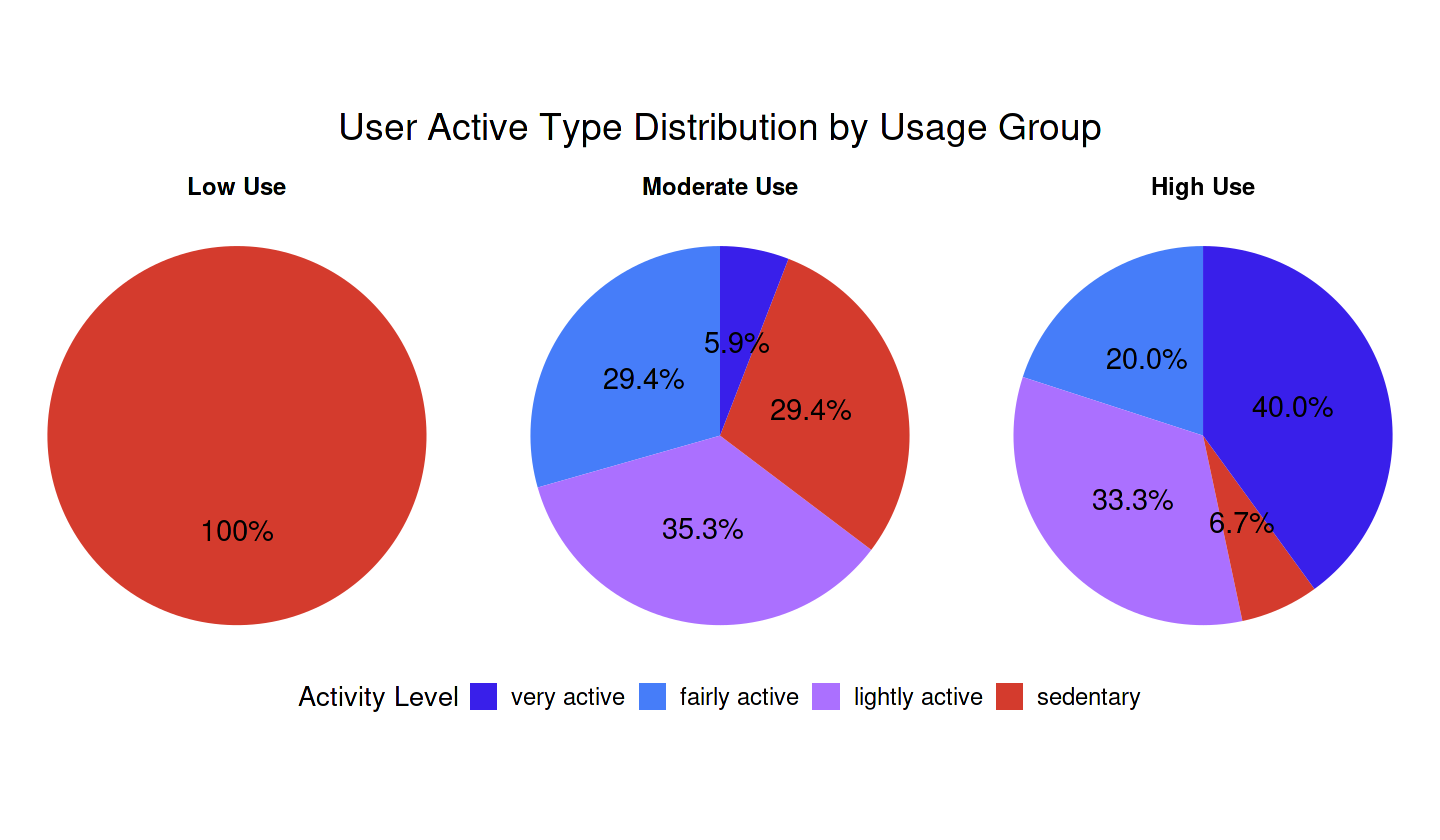

In [101]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(daily_active_use_piechart, aes(x = "", y = total_percent, fill = user_type)) +
  geom_col(width = 1, color = NA) + 
  coord_polar(theta = "y") + 
  labs(title = "User Active Type Distribution by Usage Group", fill = "Activity Level", x = NULL, y = NULL) + 
  theme_void() + 
  geom_text(aes(label = labels), 
            position = position_stack(vjust = 0.5), 
            size = 6, color = "black") +
  scale_fill_manual(values = c("very active" = "#391fea", "fairly active" = "#467df9", 
                               "lightly active" = "#ab70ff", "sedentary" = "#d43b2d")) +
  facet_wrap(~ usage_type) +
  theme(plot.title = element_text(size = 22, hjust = 0.5, vjust = 4),
        legend.position = "bottom", 
        strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
        legend.text = element_text(size = 14))

The chart provide some insights into user activity by time spent using the smart device:

- High use group are those with the highest number of very active users, with almost half of the values.
- Moderate use group presents more than half, around 67% of users who need to perform more physical activity.
- All users with low use present sedentary behavior on the days they used the smart device.

### 5.6 Total steps vs calories <a class="anchor" id="steps_vs_calories"></a> 

Total steeps vs calories data will be examined to identify a relationship. 

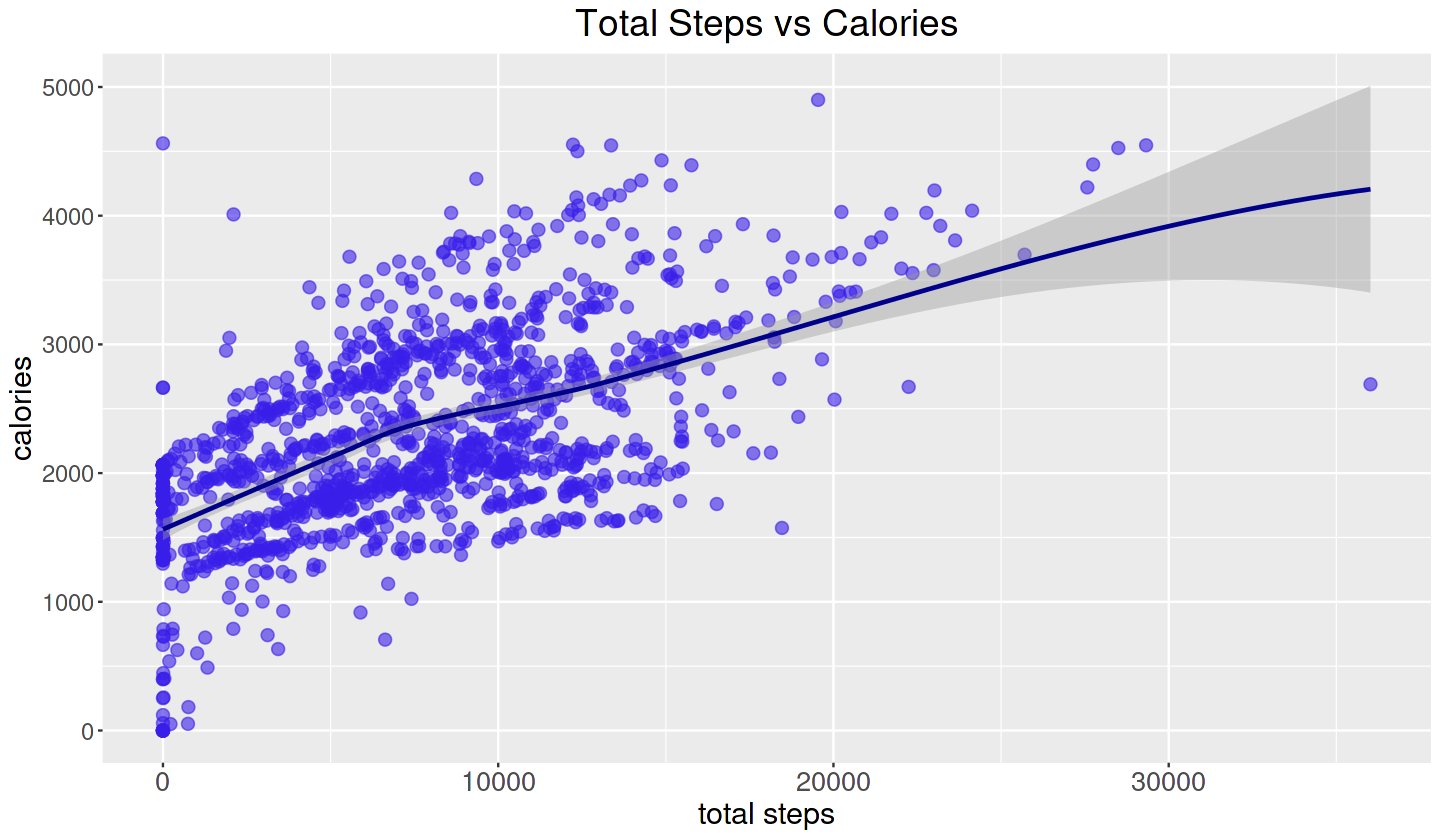

In [96]:
#making the chart
ggplot(data = daily_activity) + aes(x = TotalSteps, y = Calories) +
  geom_point(color = "#391fea", alpha = 0.6, size = 3) +
  geom_smooth(method = 'loess', formula = 'y ~ x', color = 'darkblue') +
  labs(title = "Total Steps vs Calories", y = 'calories', x = 'total steps') +
  theme(plot.title = element_text(size = 22, hjust = 0.5), 
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18), 
        axis.text.x = element_text(size = 16),  
        axis.text.y = element_text(size = 14)
  )

As expected, the data is directly related, the greater the number of steps, the greater the number of calories burned.

### 5.7 Relationship between steps and calories by time of day <a class="anchor" id="steps_calories_by_time_of_day"></a> 

The steps and calories tables will be merged to identify hour-by-hour patterns of users and their relationships.

In [97]:
hourly_calories_steps <- hourly_calories %>%
  left_join(hourly_steps, by = c("Id", "date"))

# Converting steps and calories values into averages by hour of the day.
hourly_calories_steps_grouped <- hourly_calories_steps %>%
  mutate( hour_of_day = hour(date)) %>%
  group_by(hour_of_day) %>% 
  drop_na() %>% 
  summarize(
    average_steps = mean(StepTotal, na.rm = TRUE),
    average_calories = mean(Calories, na.rm = TRUE),
    .groups = "drop" 
  ) %>%
  arrange(hour_of_day)

head(hourly_calories_steps_grouped)

hour_of_day,average_steps,average_calories
<int>,<dbl>,<dbl>
0,43.361240,72.17054
1,21.884178,69.91572
2,13.694416,68.65202
3,6.850491,67.55872
4,11.108752,68.00880
5,34.926463,79.61574


Let's create an hourly bar chart for better visualization and comparison.

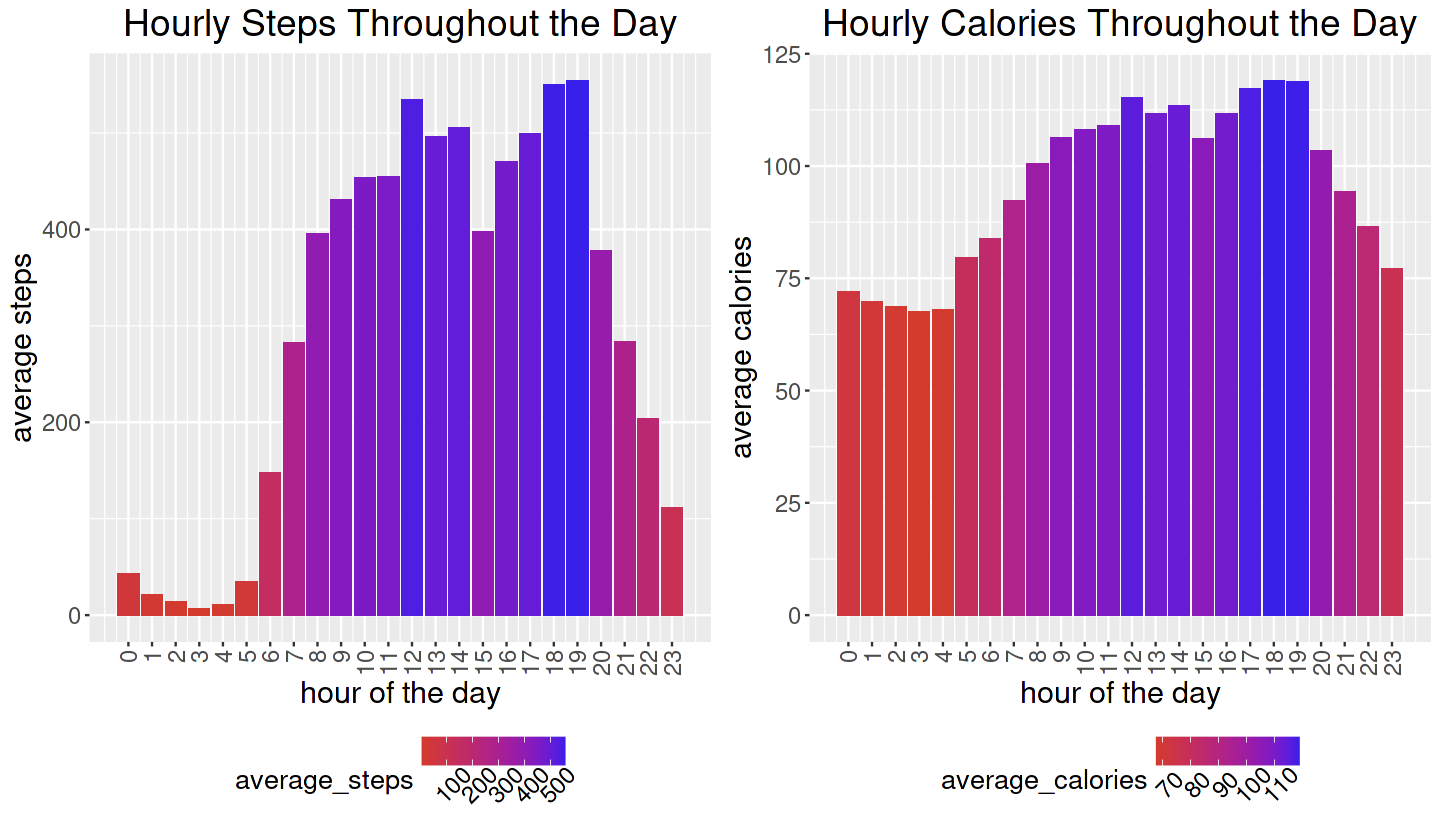

In [102]:
ggarrange(
  ggplot(data = hourly_calories_steps_grouped) +
    geom_col(aes(x = hour_of_day, y = average_steps, fill = average_steps)) + 
    labs(title = "Hourly Steps Throughout the Day", x="hour of the day", y="average steps") + 
    scale_fill_gradient(low = "#d43b2d", high = "#391fea")+
    scale_x_continuous(breaks = 0:23, 
                       labels = as.character(0:23)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 14),
          legend.position = "bottom",
          plot.title = element_text(size = 22, hjust = 0.5), 
          axis.title.x = element_text(size = 18), 
          axis.title.y = element_text(size = 18), 
          axis.text.y = element_text(size = 14),
          strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
          legend.text = element_text(size = 14, angle = 45)), 
  ggplot(data = hourly_calories_steps_grouped) +
    geom_col(aes(x = hour_of_day, y = average_calories, fill = average_calories)) + 
    labs(title = "Hourly Calories Throughout the Day", x="hour of the day", y="average calories") + 
    scale_fill_gradient(low = "#d43b2d", high = "#391fea")+
    scale_x_continuous(breaks = 0:23, 
                       labels = as.character(0:23)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 14),
          legend.position = "bottom",
          plot.title = element_text(size = 22, hjust = 0.5), 
          axis.title.x = element_text(size = 18), 
          axis.title.y = element_text(size = 18), 
          axis.text.y = element_text(size = 14),
          strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
          legend.text = element_text(size = 14, angle = 45))  
)

The charts follow very similar patterns.
From midnight to five o'clock the number of steps is close to 0, indicating that users are sleeping at these times
The **peaks** in steps and calories burned occur at **noon**, and **between five and seven o'clock at night**, indicating lunch breaks and free time after work.

### 5.8 Segmenting steps and calories by time of day and by user usage type <a class="anchor" id="steps_calories_by_time_of_day_usage"></a>

To have a more targeted view, steps and calories burned will now be segmented by usage days.

Let's repeat the conversion of steps and calorie values into averages by hour of day, but also using Id.

In [103]:
hourly_averages_by_id_and_hour <- hourly_calories_steps %>%
  mutate(hour_of_day = hour(date)) %>% 
  group_by(Id, hour_of_day) %>% 
  drop_na() %>% 
  summarize(
    average_steps = mean(StepTotal, na.rm = TRUE),
    average_calories = mean(Calories, na.rm = TRUE),
    .groups = "drop" 
  ) %>%
  arrange(Id, hour_of_day)

head(hourly_averages_by_id_and_hour)

Id,hour_of_day,average_steps,average_calories
<dbl>,<int>,<dbl>,<dbl>
1503960366,0,131.622951,60.44262
1503960366,1,44.114754,52.96721
1503960366,2,34.622951,50.80328
1503960366,3,15.262295,48.93443
1503960366,4,2.000000,47.62295
1503960366,5,2.032787,47.77049


In [104]:
# Merging with usage table
hourly_averages_usage <- hourly_averages_by_id_and_hour %>%
  left_join(daily_usage, by = "Id")

# Now the total steps and calories of users will be grouped by the hours of the day
hourly_usage_grouped <- hourly_averages_usage %>% 
  group_by(usage_type, hour_of_day) %>% 
  summarize(
    grouped_sum_steps = sum(average_steps),
    grouped_sum_calories = sum(average_calories),
    .groups = "drop"
  )

Making the first bar chart of the steps by hour.

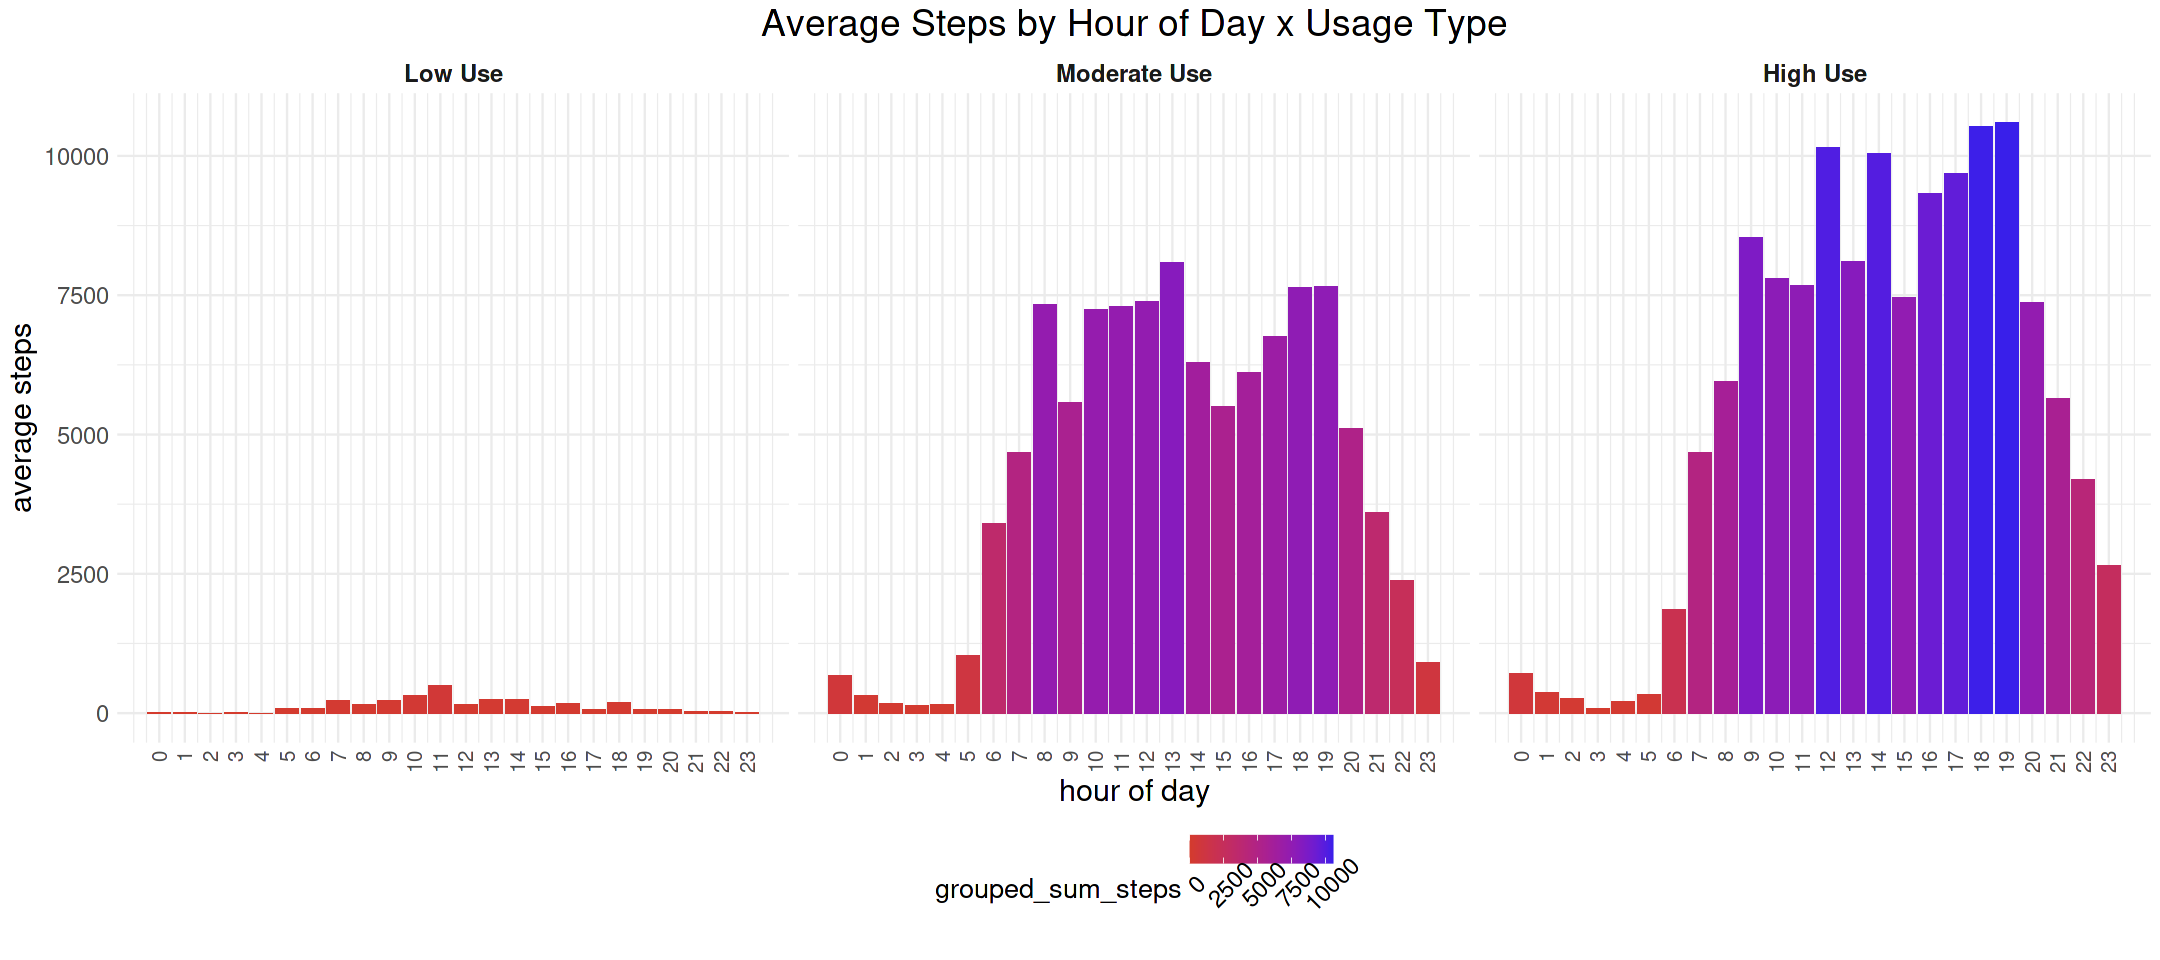

In [107]:
options(repr.plot.width = 18, repr.plot.height = 8)
ggplot(hourly_usage_grouped, aes(x = hour_of_day, y = grouped_sum_steps, fill = grouped_sum_steps)) +
  geom_col() +
  labs(title = "Average Steps by Hour of Day x Usage Type",
       x = "hour of day", y = "average steps") +
  scale_fill_gradient(low = "#d43b2d", high = "#391fea") +
  scale_x_continuous(breaks = 0:23, labels = as.character(0:23)) +
  facet_wrap(~ usage_type) + 
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12),
          legend.position = "bottom",
          plot.title = element_text(size = 22, hjust = 0.5), 
          axis.title.x = element_text(size = 18), 
          axis.title.y = element_text(size = 18), 
          axis.text.y = element_text(size = 14),
          strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
          legend.text = element_text(size = 14, angle = 45))


Making the other bar chart of the calories burned per hour.

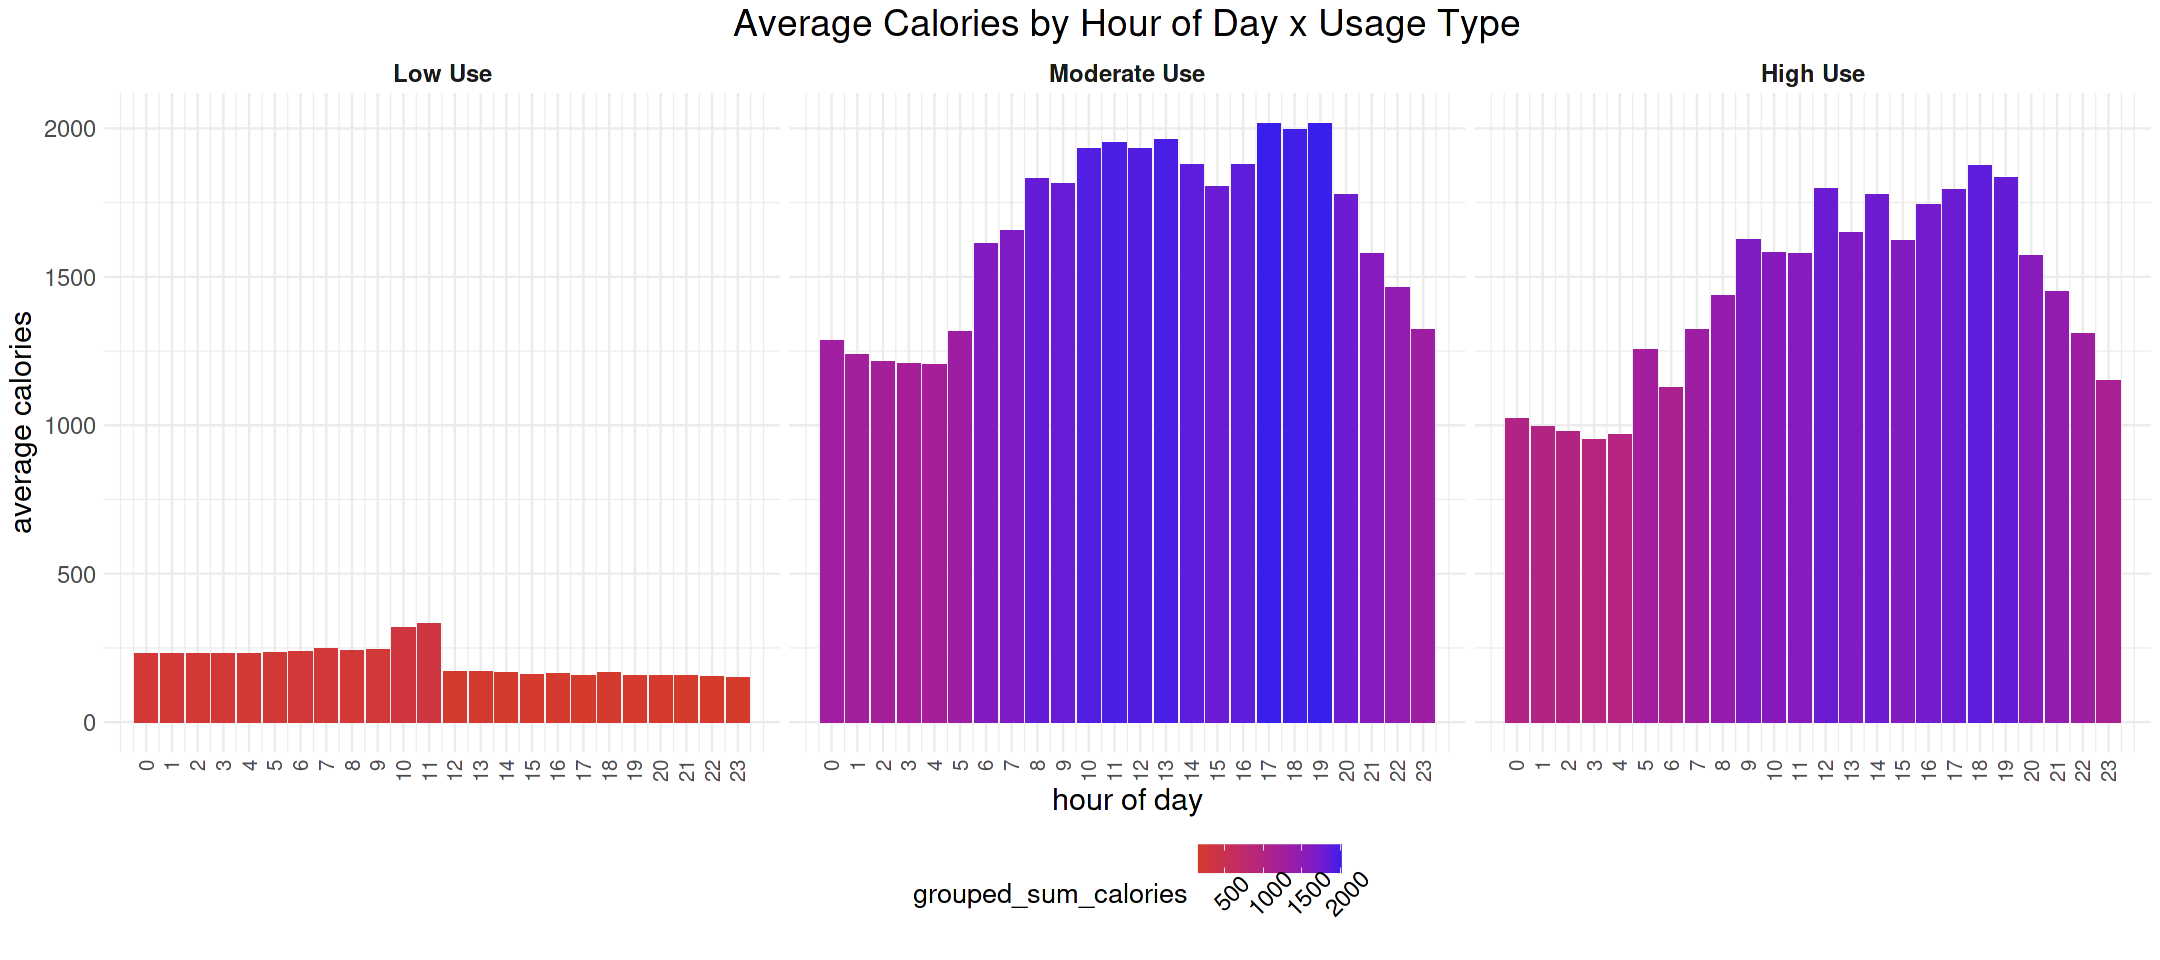

In [108]:
ggplot(hourly_usage_grouped, aes(x = hour_of_day, y = grouped_sum_calories, fill = grouped_sum_calories)) +
  geom_col() +
  labs(title = "Average Calories by Hour of Day x Usage Type",
       x = "hour of day", y = "average calories") +
  scale_fill_gradient(low = "#d43b2d", high = "#391fea") +
  scale_x_continuous(breaks = 0:23, labels = as.character(0:23)) +
  facet_wrap(~ usage_type) + 
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12),
          legend.position = "bottom",
          plot.title = element_text(size = 22, hjust = 0.5), 
          axis.title.x = element_text(size = 18), 
          axis.title.y = element_text(size = 18), 
          axis.text.y = element_text(size = 14),
          strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
          legend.text = element_text(size = 14, angle = 45)) 

The charts give us some insights:
- The **low-use** group has the **lowest** number of steps recorded.
- The moderate-use group starts recording an increase in the number of steps an hour earlier than the high-use group, but the high-use group maintains a relatively higher level of activity later in the day.
- Although the high-use group engages in more activity, **the number of calories burned by the moderate group is higher, indicating a pattern of overweight**.

### 5.9 BMI levels <a class="anchor" id="bmi_levels"></a>

The data will be grouped by BMI averages to identify the weight characteristics of users.

- Underweight - Less than 18.5.
- Healthy weight - Between 18.5 and 24.9.
- Overweight - Between 25 and 29.9.
- Obese - More than 30.

This data further narrows our research with only 13 users available.

First, let's find the average BMI per user.

In [109]:
weight_grouped <- weight %>%
  group_by(Id) %>%
  summarise(BMI = mean(BMI))

Categorizing BMI user type.

In [110]:
weight_user_type <- weight_grouped %>%
  mutate(
    BMI = case_when(
      BMI < 18.5 ~ "underweight",
      BMI >= 18.5 &
        BMI < 25 ~ "healthy weight",
      BMI >= 25 &
        BMI < 30 ~ "overweight",
      BMI >= 30 ~ "obese"
    ))

head(weight_user_type)

Id,BMI
<dbl>,<chr>
1503960366,healthy weight
1927972279,obese
2347167796,healthy weight
2873212765,healthy weight
2891001357,overweight
4319703577,overweight


In [111]:
# Transforming floatings into percentage to improve analysis
weight_user_type_percent <- weight_user_type %>%
  count(BMI) %>%
  mutate(total_percent = n / sum(n),
         labels = scales::percent(total_percent)) %>%
  mutate(BMI = factor(BMI, levels = c("underweight", "healthy weight", "overweight", "obese")))

head(weight_user_type_percent)

BMI,n,total_percent,labels
<fct>,<int>,<dbl>,<chr>
healthy weight,4,0.3076923,31%
obese,2,0.1538462,15%
overweight,7,0.5384615,54%


The majority of users are overweight with 7 users in total, followed by healthy weight with 9 users and only 2 obese users in last place. This categorization did not find any underweight users.

Let's convert these numbers to a pie chart. 

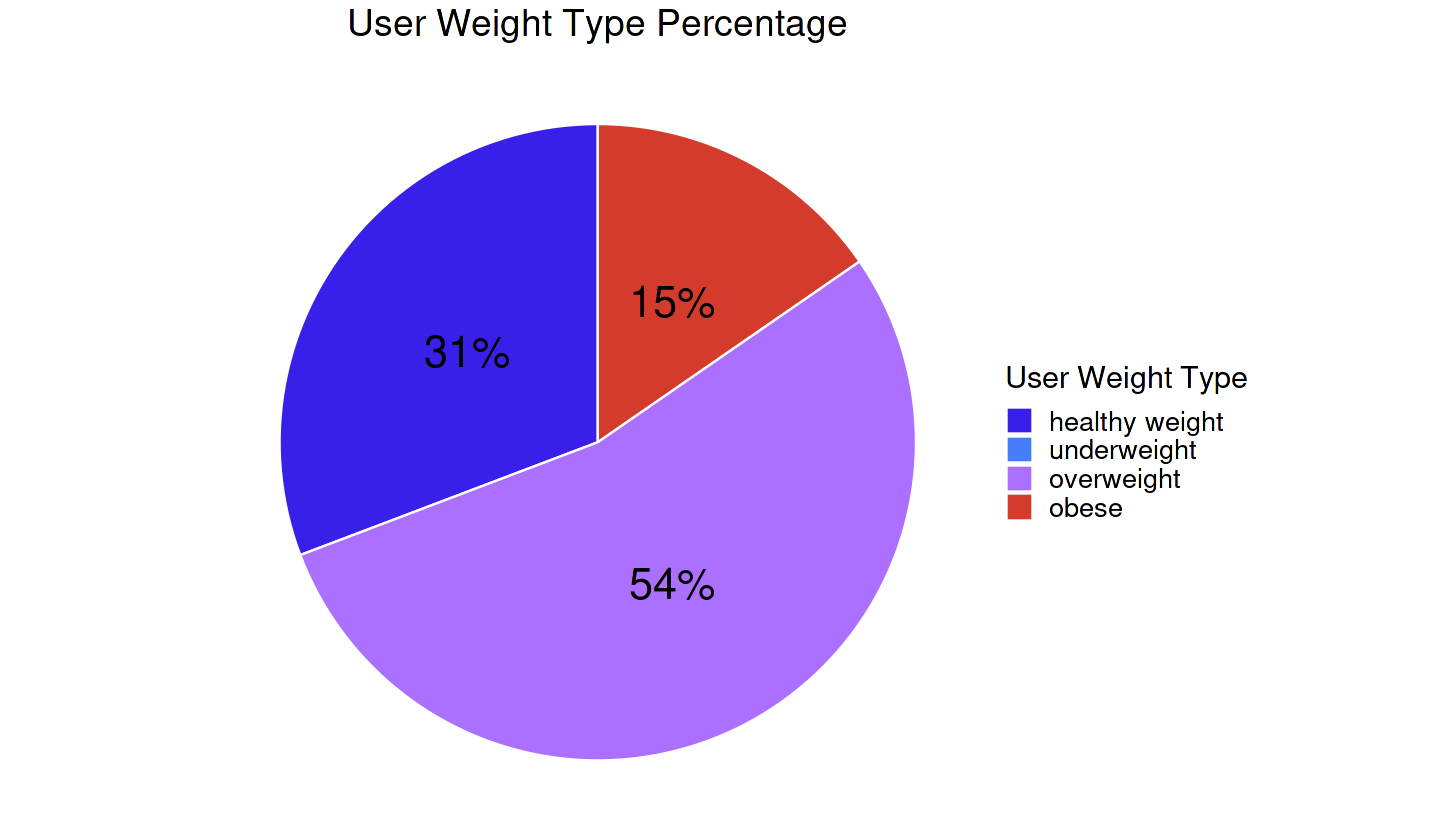

In [113]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(weight_user_type_percent, aes(x = "", y = total_percent, fill = BMI)) +
  geom_col(width = 11, color = "white") +
  coord_polar(theta = "y") + 
  labs(title = "User Weight Type Percentage", fill = "User Weight Type", x = NULL, y = NULL) + 
  theme_void() + 
  geom_text(aes(label = labels), 
            position = position_stack(vjust = 0.5), 
            size = 9, color = "black") + 
  scale_fill_manual(values = c("healthy weight" = "#391fea", "underweight" = "#467df9",
                               "overweight" = "#ab70ff", "obese" = "#d43b2d")) +
  theme(plot.title = element_text(size = 22, hjust = 0.5), legend.title = element_text(size = 18),
        legend.text = element_text(size = 16))

Around 69% of users are overweight.
This categorization can be used as a marketing strategy to provide personalized diet and exercise tips for each group with different goals.

### 5.10 BMI levels vs usage type <a class="anchor" id="bmi_levels_usage"></a>

For a more targeted view, BMI levels will now be segmented by days used.

In [115]:
#merging tables
weight_user_type_usage <- weight_user_type %>%
  left_join(daily_usage, by = "Id") 

# Transforming values into percentage.
weight_user_type_usage_piechart <- weight_user_type_usage %>%
  group_by(usage_type, BMI) %>%
  summarise(n_users = n(), .groups = "drop_last") %>% 
  mutate(
    total_in_facet = sum(n_users), 
    total_percent = n_users / total_in_facet, 
    labels = scales::percent(total_percent)
  ) %>%
  ungroup()

Let's convert these numbers to a pie chart.

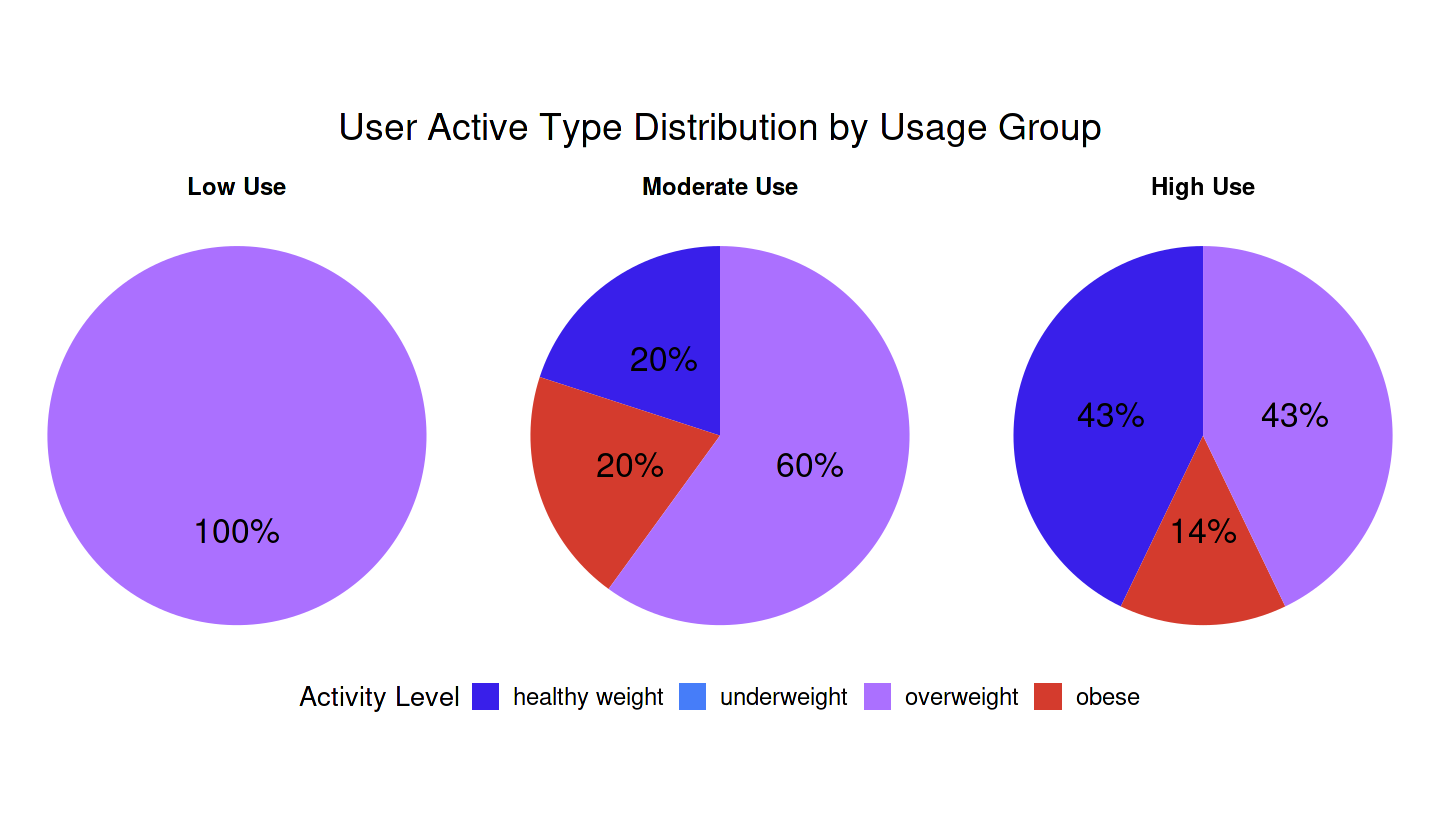

In [116]:
ggplot(weight_user_type_usage_piechart, aes(x = "", y = total_percent, fill = BMI)) +
  geom_col(width = 1) + 
  coord_polar(theta = "y") + 
  labs(title = "User Active Type Distribution by Usage Group", fill = "Activity Level", x = NULL, y = NULL) + 
  theme_void() + 
  geom_text(aes(label = labels), 
            position = position_stack(vjust = 0.5), 
            color = "black", size = 7) + 
  scale_fill_manual(values = c("healthy weight" = "#391fea", "underweight" = "#467df9",
                               "overweight" = "#ab70ff", "obese" = "#d43b2d")) +
  facet_wrap(~ usage_type) + 
  theme(plot.title = element_text(size = 22, hjust = 0.5, vjust = 4),
        legend.position = "bottom", 
        strip.text = element_text(size = 14, face = "bold"), legend.title = element_text(size = 16),
        legend.text = element_text(size = 14))

The charts give us some insights:
- High use group has the highest amount of very active, with almost half of the values.
- Moderate use group has more than half, around 67%, of users who need to perform more physical activities.
- All low use users have sedentary behaviors on the days they used the smart device.

### 5.11 BMI vs average steps <a class="anchor" id="bmi_average_steps"></a>

Let's analyze the relationship between the BMI number and the average number of steps. 

First, I created a table by merging the weight and activity tables.

In [117]:
activity_weight_type <- weight_user_type %>%
  left_join(daily_activity, by = "Id")

# Creating a new table to find mean steps per BMI type

#finding mean steps per BMI type 
activity_weight_type_plot <- activity_weight_type %>%
  group_by(BMI) %>%
  summarise(
    mean_steps = mean(TotalSteps, na.rm = TRUE),
    n_users = n_distinct(Id)
  ) 

head(activity_weight_type_plot)

BMI,mean_steps,n_users
<chr>,<dbl>,<int>
healthy weight,9997.702,4
obese,3007.404,2
overweight,8705.200,7


Let's transform those values in a bar chart.

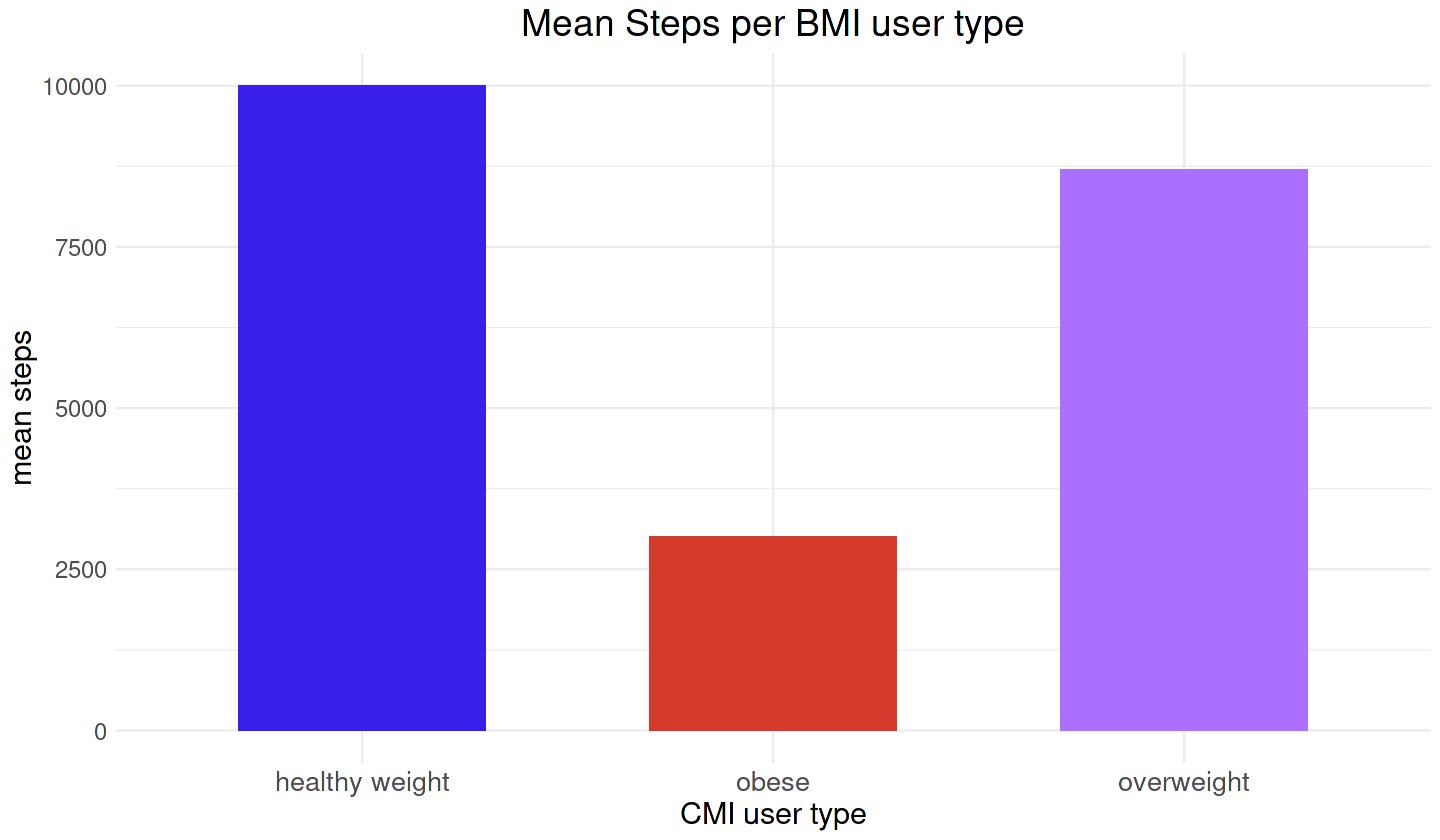

In [118]:
ggplot(activity_weight_type_plot, aes(x = BMI, y = mean_steps, fill = BMI)) + #BMI x steps
  geom_col(width = 0.6) +
  labs(title = "Mean Steps per BMI user type",
       x = "CMI user type", y = "mean steps") +
  scale_fill_manual(values = c("healthy weight" = "#391fea", "underweight" = "#467df9",
                               "overweight" = "#ab70ff", "obese" = "#d43b2d")) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 22, hjust = 0.5), 
    axis.title.x = element_text(size = 18), 
    axis.title.y = element_text(size = 18), 
    axis.text.x = element_text(size = 16),  
    axis.text.y = element_text(size = 14)   
  )

The difference in the average number of steps taken by the obese group is clear, while healthy weight and overweight groups are close to the suggested goal of 10,000 steps.

### 5.12 Exploring the sleeping time table  <a class="anchor" id="sleeping_time"></a>

To analyze users' sleep time, the relationship between sleep time and time in bed will first be explored.

For better visualization, the table will be convert minutes to hours.

In [119]:
sleep_hour_04 <- sleep_day_04 %>%
  mutate(
    TotalHoursAsleep = round(sleep_day_04$TotalMinutesAsleep / 60, 1),
    TotalHoursInBed = round(sleep_day_04$TotalTimeInBed / 60, 1)
  )

head(sleep_hour_04)

,Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed
,<dbl>,<date>,<int>,<int>,<int>,<dbl>,<dbl>
1,1503960366,2016-04-12,1,327,346,5.4,5.8
2,1503960366,2016-04-13,2,384,407,6.4,6.8
3,1503960366,2016-04-15,1,412,442,6.9,7.4
4,1503960366,2016-04-16,2,340,367,5.7,6.1
5,1503960366,2016-04-17,1,700,712,11.7,11.9
6,1503960366,2016-04-19,1,304,320,5.1,5.3


Let's transform the values to a chart for better visualization. 

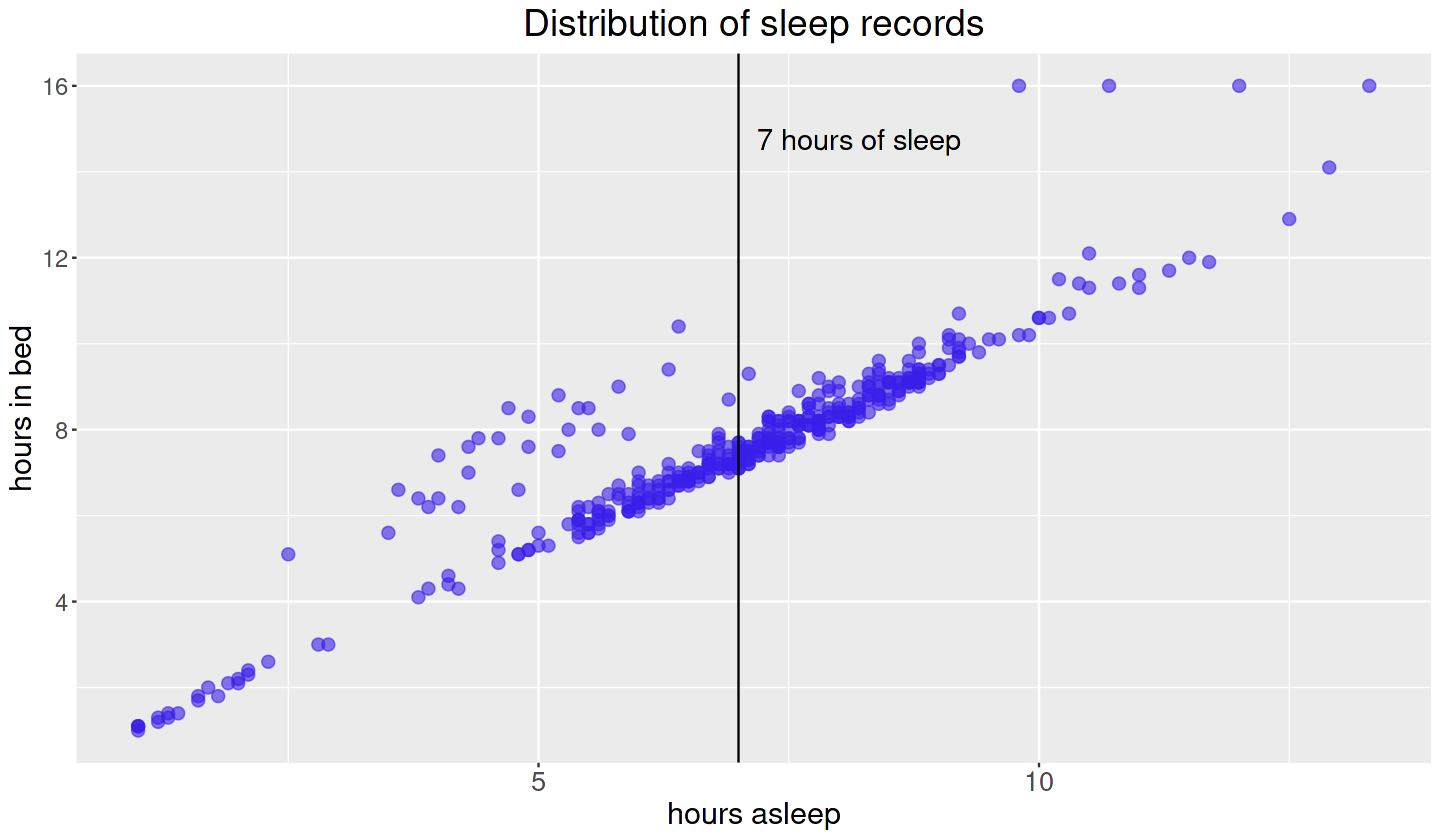

In [120]:
ggplot(data = sleep_hour_04) +
  geom_point(mapping = aes(x = TotalHoursAsleep, y= TotalHoursInBed), alpha = 0.6, color = "#391fea",size = 3) +
  geom_vline(aes(xintercept = 7), linetype = "solid") +
  labs(title = "Distribution of sleep records", x = 'hours asleep', y = 'hours in bed') +
  annotate("text", x = 8.2, y = 15, label = "7 hours of sleep", hjust = 0.5, vjust = 1, size = 6) +
  theme(plot.title = element_text(size = 22, hjust = 0.5), 
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18), 
        axis.text.x = element_text(size = 16),  
        axis.text.y = element_text(size = 14)
  )

The chart give us some insights:
- **The average values are close to 7 hours of sleep, the minimum recommended for a healthy routine.**

- The number of hours spent in bed with a much higher difference in relation to the time spent sleeping occurs more often in hours spent sleeping less than 7 hours, and may indicate insomnia.

- Recommendations for better sleep may be useful for users who sleep little or suffer from insomnia.

To have an overview of each user's behavior, the average time spent in bed and time spent sleeping were calculated.

The discrepant values between time spent sleeping and time spent in bed may indicate the behavior of only one user. The new table will be important to validate this hypothesis.

In [121]:
#grouping Id's averages
sleep_04_grouped <- sleep_hour_04 %>% 
  group_by(Id) %>%
  summarise(mean_hoursasleep = mean(TotalHoursAsleep), mean_hoursinbed = mean(TotalHoursInBed))

head(sleep_04_grouped)

Id,mean_hoursasleep,mean_hoursinbed
<dbl>,<dbl>,<dbl>
1503960366,6.012000,6.396000
1644430081,4.925000,5.775000
1844505072,10.833333,16.000000
1927972279,6.940000,7.280000
2026352035,8.439286,8.960714
2320127002,1.000000,1.100000


For a deeper analysis, the table will already be unique with the usage type to see if we identify any pattern.

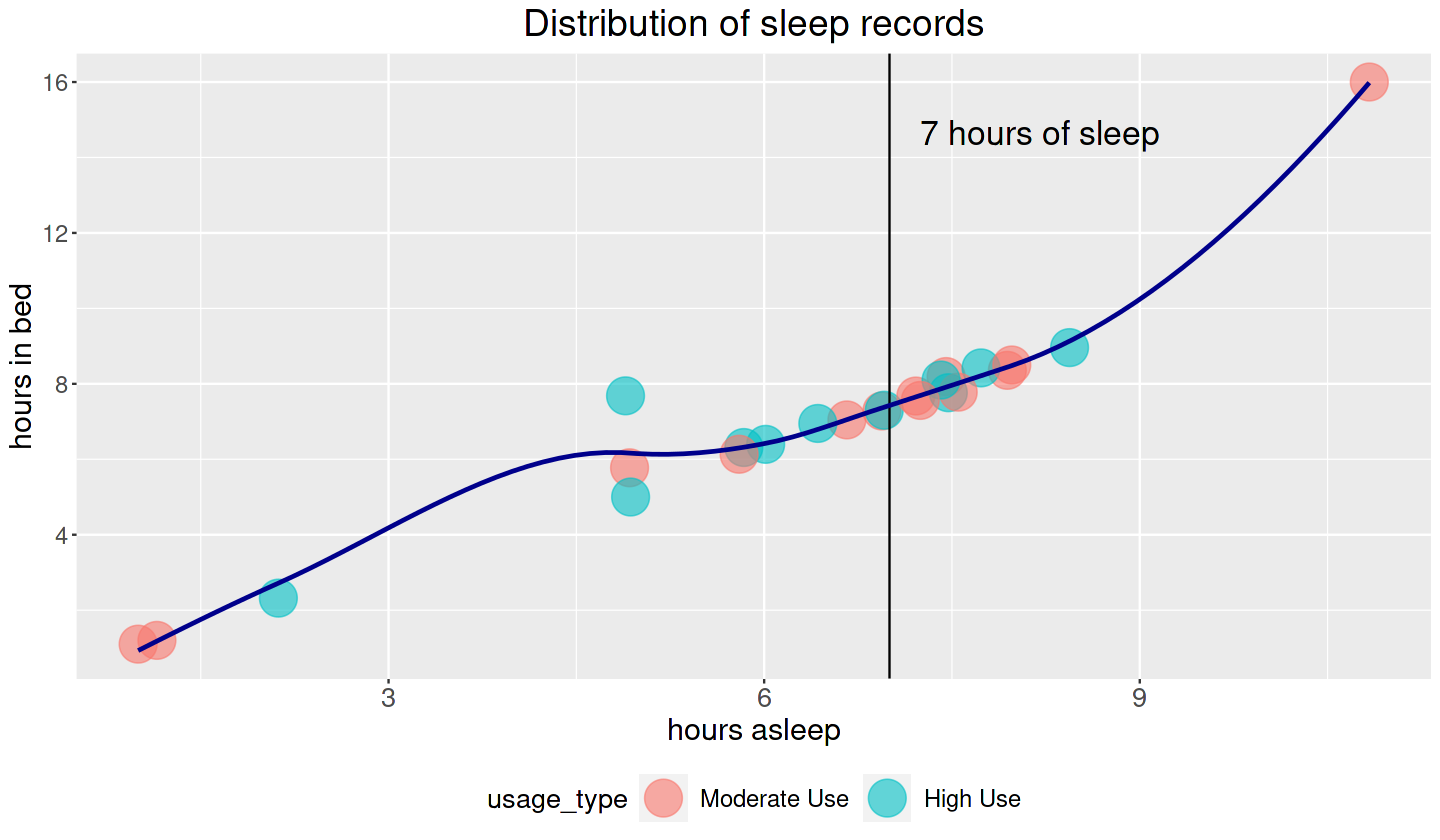

In [122]:
sleep_usage_type_04 <- sleep_04_grouped %>% 
  left_join(daily_usage, by = "Id")

# Let's redo the chart with the new information.
ggplot(data = sleep_usage_type_04) + aes(x = mean_hoursasleep, y = mean_hoursinbed, , color = usage_type) +
  geom_point(alpha = 0.6, size = 10) +
  geom_vline(aes(xintercept = 7), linetype = "solid") +
  geom_smooth(method = 'loess', formula = 'y ~ x', color = 'darkblue', se = FALSE) +
  labs(title = "Distribution of sleep records", x = 'hours asleep', y = 'hours in bed') +
  annotate("text", x = 8.2, y = 15, label = "7 hours of sleep", hjust = 0.5, vjust = 1, size = 7) +
  theme(legend.position = "bottom",
        plot.title = element_text(size = 22, hjust = 0.5), 
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18), 
        axis.text.x = element_text(size = 16),  
        axis.text.y = element_text(size = 14),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)
  )

The chart give us some insights:
- This graph shows more clearly the number of users sleeping less than the recommended 7 hours.
- It is clear that users probably suffer from insomnia, spending an average of 8 hours in bed but sleeping less than 6 hours.
- Apart from the outliers, there does not seem to be a huge difference between the usage type groups (no low usage was found in the sleep table).

### 5.13 Sedentary time vs asleep time  <a class="anchor" id="sedentary_asleep_time"></a>

The daily activity and sleep day tables will be merged to identify the relationship between sedentary minutes and minutes asleep (using data from month 04 only).

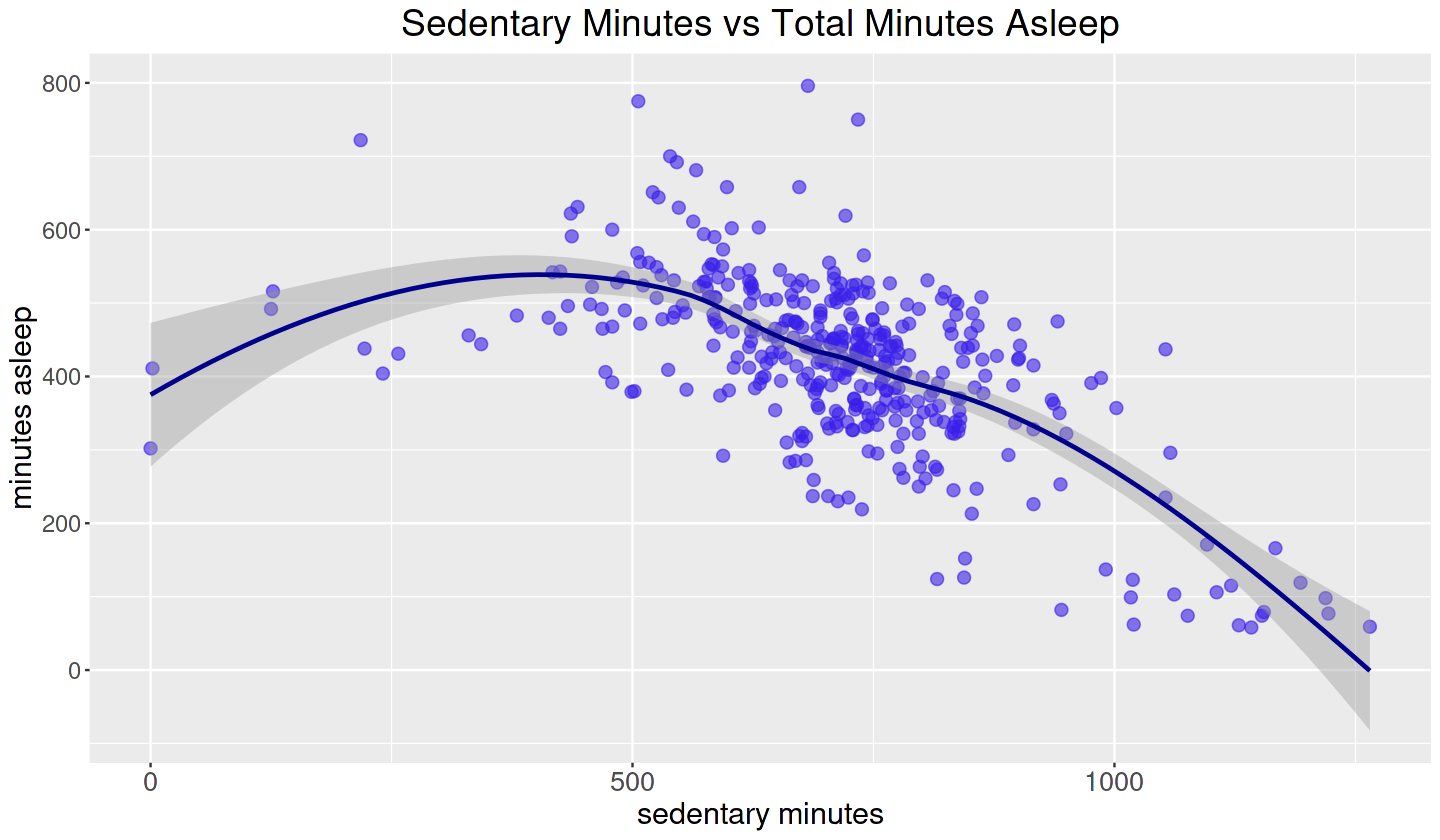

In [123]:
daily_activity_sleep_04 <- daily_activity_04 %>%  
  merge(sleep_hour_04, by=c ("Id", "date"))

#making the chart
ggplot(data = daily_activity_sleep_04, aes(x = SedentaryMinutes, y = TotalMinutesAsleep)) +
  geom_point(color = "#391fea", alpha = 0.6, size = 3) +
  geom_smooth(method = 'loess', formula = 'y ~ x', color = 'darkblue') +
  labs(title = "Sedentary Minutes vs Total Minutes Asleep", x = 'sedentary minutes', y = 'minutes asleep') + 
  theme(
    plot.title = element_text(size = 22, hjust = 0.5), 
    axis.title.x = element_text(size = 18), 
    axis.title.y = element_text(size = 18), 
    axis.text.x = element_text(size = 16),  
    axis.text.y = element_text(size = 14)   
  )

The fewer minutes of sedentary lifestyle, the greater the amount of minutes slept, since physical activity improves the quality of sleep.

### 5.14 How well users slept  <a class="anchor" id="how_well_users_slept"></a>

The data will be grouped by hourly intervals to better identify users' sleep characteristics, following the following patterns:
- Sleep little - Less than 7.
- Sleep ideally - Between 7 and 9.
- Sleep a lot - More than 9.

In [124]:
sleep_user_type_04 <- sleep_04_grouped %>%
  mutate(
    mean_hoursasleep = case_when(
      mean_hoursasleep < 7 ~ "sleep little",
      mean_hoursasleep >= 7 &
        mean_hoursasleep < 9 ~ "sleep ideally",
      mean_hoursasleep >= 9 ~ "sleep a lot"
    ))

head(sleep_user_type_04)

Id,mean_hoursasleep,mean_hoursinbed
<dbl>,<chr>,<dbl>
1503960366,sleep little,6.396000
1644430081,sleep little,5.775000
1844505072,sleep a lot,16.000000
1927972279,sleep little,7.280000
2026352035,sleep ideally,8.960714
2320127002,sleep little,1.100000


In [125]:
# Transforming values into percentage
sleep_user_type_04_percent <- sleep_user_type_04 %>%
  count(mean_hoursasleep) %>%
  mutate(total_percent = n / sum(n),
         labels = scales::percent(total_percent)) %>%
  mutate(mean_hoursasleep = factor(mean_hoursasleep, levels = c("sleep little", "sleep ideally", "sleep a lot")))

head(sleep_user_type_04_percent)

mean_hoursasleep,n,total_percent,labels
<fct>,<int>,<dbl>,<chr>
sleep a lot,1,0.04166667,4%
sleep ideally,10,0.41666667,42%
sleep little,13,0.54166667,54%


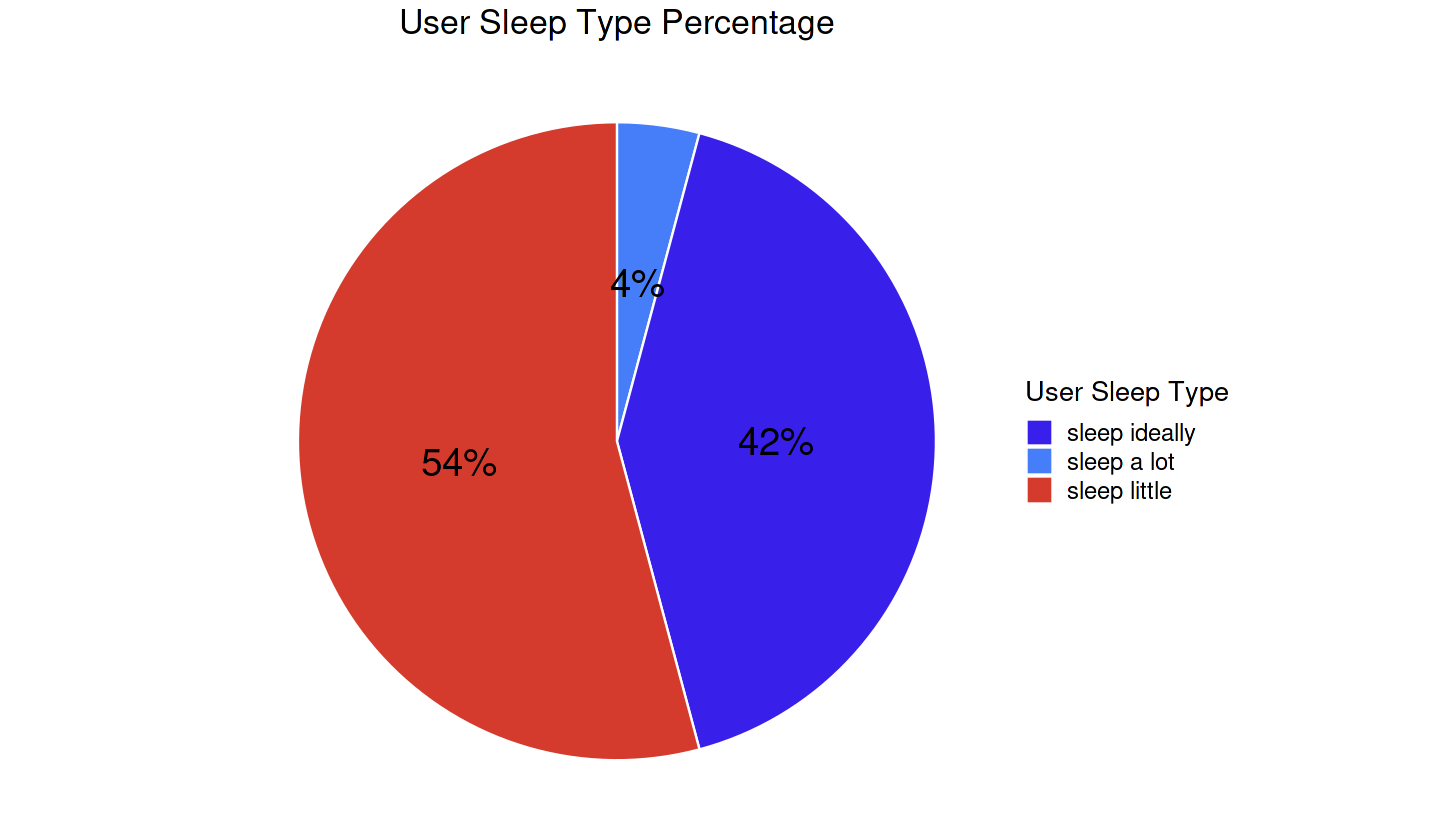

In [126]:
# making a pie chart
ggplot(sleep_user_type_04_percent, aes(x = "", y = total_percent, fill = mean_hoursasleep)) +
  geom_col(width = 11, color = "white") + 
  coord_polar(theta = "y") + 
  labs(title = "User Sleep Type Percentage", fill = "User Sleep Type", x = NULL, y = NULL) + 
  theme_void() + 
  geom_text(aes(label = labels), 
            position = position_stack(vjust = 0.5), 
            size = 8, color = "black") + 
  scale_fill_manual(values = c("sleep ideally" = "#391fea",
                               "sleep a lot" = "#467df9",
                               "sleep little" = "#d43b2d")) +
 theme(plot.title = element_text(size = 20, hjust = 0.5), legend.title = element_text(size = 16),
       legend.text = element_text(size = 14) # 
  )

Looking at the graph, it became clear that more than 50% of users do not get the ideal amount of sleep, which reinforces an opportunity for tips and services to improve sleep.

### 5.15 BMI levels vs time asleep  <a class="anchor" id="bmi_vs_asleep"></a>

To continue exploring BMI levels, let's analyze the relationship between BMI vs time asleep. The operation will be the same as before, but only with data from month 04, since the time asleep table only exists in that month.

In [127]:
#merging tables
sleep_weight_type_04 <- weight_user_type %>%
  left_join(sleep_hour_04, by = "Id", "date") 

#finding mean minutes asleep per BMI type in 04 for chart
sleep_weight_type_04_plot <- sleep_weight_type_04 %>%
  group_by(BMI) %>%
  summarise(
    mean_sleep = mean(TotalHoursAsleep, na.rm = TRUE),
    n_users = n_distinct(Id)
  ) 

head(sleep_weight_type_04_plot)

BMI,mean_sleep,n_users
<chr>,<dbl>,<int>
healthy weight,6.953521,4
obese,6.506061,2
overweight,7.053571,7


Let's transform those values in a bar chart.

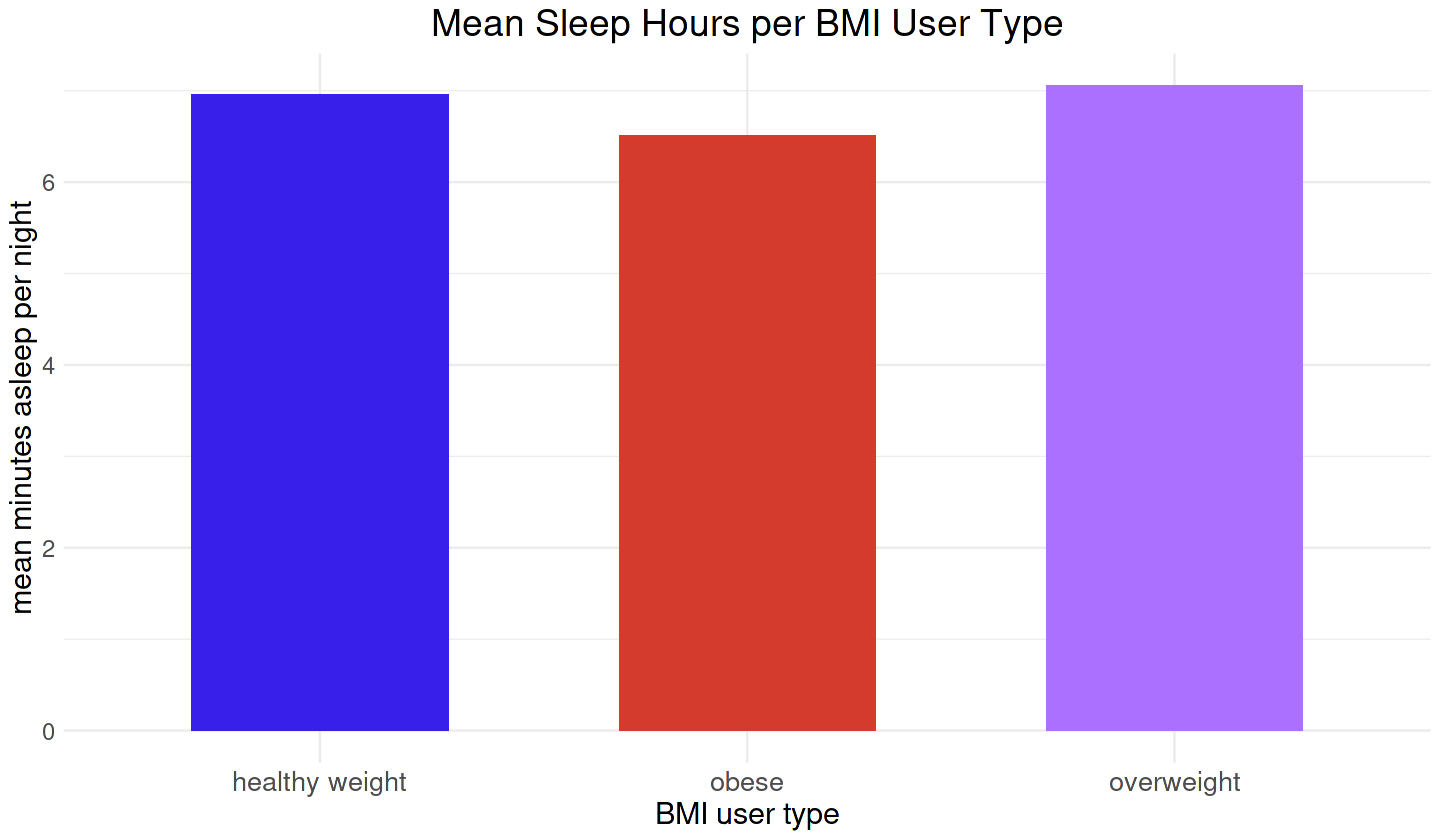

In [128]:
ggplot(sleep_weight_type_04_plot, aes(x = BMI, y = mean_sleep, fill = BMI)) +
  geom_col(width = 0.6) +
  labs(title = "Mean Sleep Hours per BMI User Type",
       x = "BMI user type", y = "mean minutes asleep per night") +
  scale_fill_manual(values = c("healthy weight" = "#391fea", "underweight" = "#467df9",
                                "overweight" = "#ab70ff", "obese" = "#d43b2d")) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 22, hjust = 0.5), 
    axis.title.x = element_text(size = 18), 
    axis.title.y = element_text(size = 18), 
    axis.text.x = element_text(size = 16),  
    axis.text.y = element_text(size = 14)   
  )

The different types of BMI do not seem to have major differences in sleeping time.

Only the obese group shows a slight difference with the time being slightly less than 7 hours.

### 5.16 Steps and time asleep per day of the week  <a class="anchor" id="steps_asleep_day_of_the_week"></a>

The average number of steps and hours slept will be grouped by day of the week for analysis.

In [129]:
#transforming date to day of the week
weekday_steps_sleep_04 <- daily_activity_sleep_04 %>%
  mutate(weekday = weekdays(date))

#sorting by day of week
weekday_steps_sleep_04$weekday <- ordered(weekday_steps_sleep_04$weekday, 
                                          levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

#finding averages by day of the week.
weekday_mean_steps_sleep_04 <- weekday_steps_sleep_04 %>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(TotalSteps), daily_sleep = mean(TotalHoursAsleep))

head(weekday_mean_steps_sleep_04)

weekday,daily_steps,daily_sleep
<ord>,<dbl>,<dbl>
Sunday,7297.855,7.543636
Monday,9273.217,6.989130
Tuesday,9182.692,6.749231
Wednesday,8022.864,7.239394
Thursday,8183.516,6.690625
Friday,7901.404,6.761404


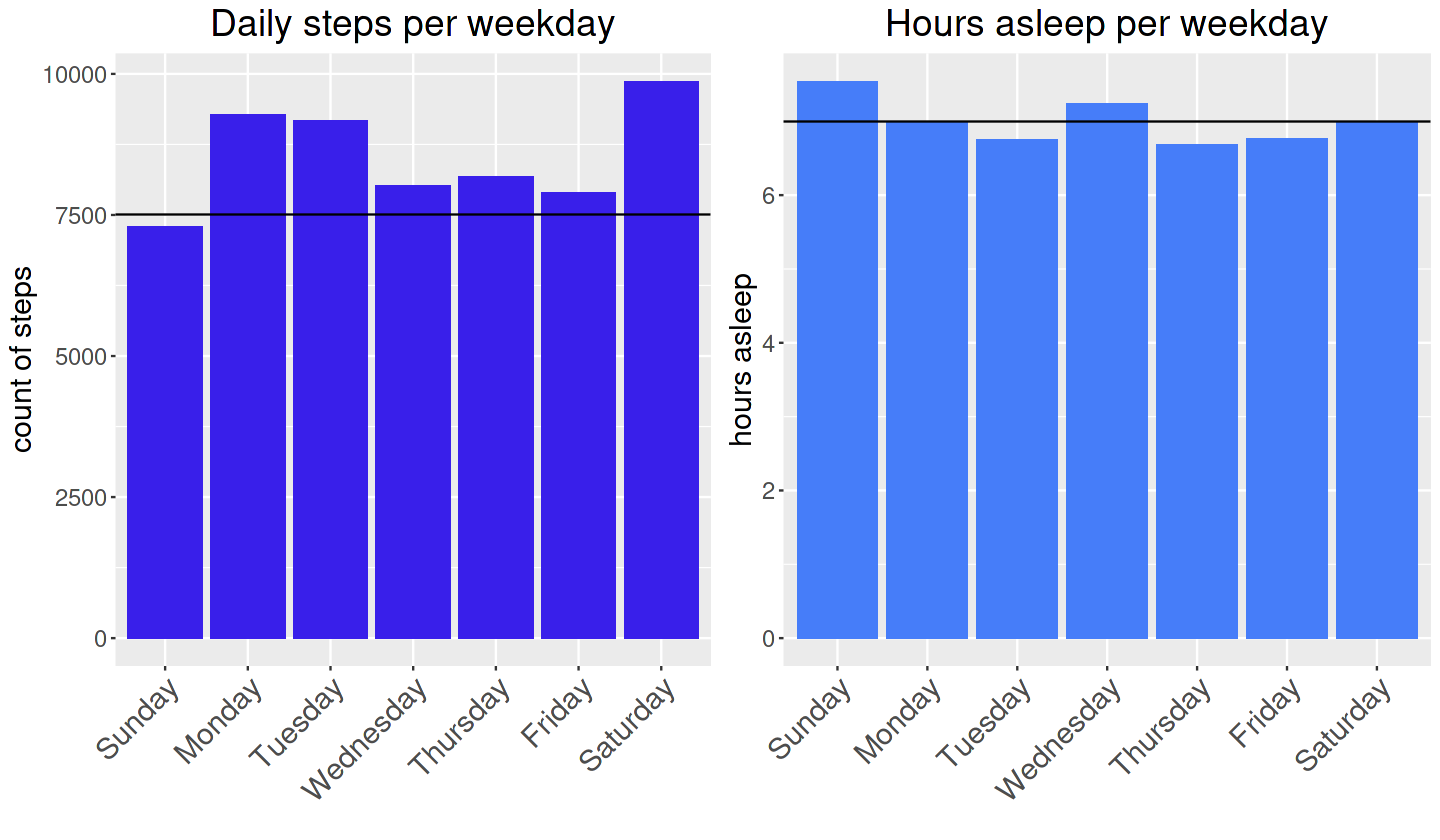

In [130]:
# Making the chart to summarize data.
ggarrange(
  ggplot(data = weekday_mean_steps_sleep_04) +
    geom_col(aes(weekday, daily_steps), fill = "#391fea") +
    geom_hline(yintercept = 7500) +
    labs(title = "Daily steps per weekday", x= "", y = "count of steps") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1,size = 18),
         plot.title = element_text(size = 22, hjust = 0.5), 
         axis.title.y = element_text(size = 18),  
         axis.text.y = element_text(size = 14)), 
  ggplot(weekday_mean_steps_sleep_04, aes(weekday, daily_sleep)) +
    geom_col(fill = "#467df9") +
    geom_hline(yintercept = 7) +
    labs(title = "Hours asleep per weekday", x= "", y = "hours asleep") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 18),
         plot.title = element_text(size = 22, hjust = 0.5), 
         axis.title.y = element_text(size = 18),  
         axis.text.y = element_text(size = 14))
)

The charts give us some insights:
- The day with the highest number of steps is Saturday, the first day of the weekend, while the day with the lowest is Sunday.
- Sunday and Wednesday are the days with the best sleeping hours.
- Because it is usually a day of rest, Sunday has opposite numbers of steps and sleeping time.

# <span style="color:#FA8072"> 6. Insights </span> <a class="anchor" id="insights"></a>

The Bellabeat app is a guide that empowers women in healthy habits and routines by educating and motivating them through daily app recommendations. Taking this into consideration, the insights found will be presented that can help both improve the results of the company's services and the habits of its customers.

Without gender being clear in Fitbit's data, it is difficult to apply all the insights directly to Bellabeat's female audience, but I assumed that all genders were presented and balanced in this data set.

Some parameters remain constant across all users. As recommended by health organizations, the more steps per day, the better the overall health and the more calories burned, and the less sedentary time, the better the quality of sleep.

Encouraging users to maintain at least 7,500 steps per day, explaining the benefits, would be extremely important to improve overall health. The highest number of steps shown is around noon, at lunchtime, and between 5 pm and 7 pm, after work. The days with the most physical activity recorded are Monday, Tuesday and Saturday, while the day with the least activity recorded is Sunday.

More than half of users sleep less than the minimum of 7 hours per day recommended for healthy sleep. Implementing resources to help users improve their sleep health could be an interesting opportunity for Bellabeat.

Segmenting users into different groups and cross-referencing this data helps to better understand their routine as a whole, identify common patterns and provide more targeted options for activities and tips for a healthy routine.

The group that uses the device the most has healthier lifestyles overall, with a higher percentage of very active users and healthy weights.

The longer they use the device, the more data is collected, better understanding the user's behavior and allowing for better recommendations. More research could be conducted to understand why the "Low Use" and "Moderate Use" groups are not using their devices more frequently, whether because they feel they need to use them only when they are physically active or for some other unknown reason. Applying incentives to increase the time spent using smart devices can be beneficial for both sides.

# <span style="color:#FA8072"> 7. Recommendations </span> <a class="anchor" id="recommendations"></a>

- Segment customers further and identify patterns, crossing different categories such as: activity level, weight and sleep time. This would allow for a better understanding of behavior and motivations, to recommend personalized tips and goals for different types of objectives, thus creating a greater connection with users, improving engagement with the brand's products and increasing the chances of them continuing to use the service.

- As we have seen, users who use the smart device more often also have better health patterns, investing in increasing this time with incentives and new features can be beneficial for both parties, since it would be possible to better understand each user to improve personal insights, thus also satisfying and increasing service time. Customized alerts based on data could be created, such as: push notifications, e-mails and reports, which monitor activity during the days of the week and provide feedback on whether the goal was reached or below, with motivational messages, to remind them to use the products. Another option would be to create gamification systems in the app, which would connect users with friends to see activities and metrics, with the possibility of collective goals, increasing engagement.

- Another interesting personalized content, aimed at improving the number of steps on Sunday, usually a day of rest, consequently improving weekly metrics, would be to recommend tips for tours and places to visit around the user's city, so as to indirectly increase the time of physical activity while they are distracted and increase the weekly average of activity.

- The sleep time of most users is at the minimum recommended sleep limit for a healthy routine. Encouraging users to monitor the quality of their sleep could be interesting to improve sleep time and strengthen the bond with the brand's products. Alerts could be created to relax before bedtime and to sleep. Identifying whether users suffer from any type of insomnia and offering tips on solutions would also increase trust and engagement with the brand's products. Other general sleep improvement tips could also include relaxing reading and podcasts, breathing techniques and mindfulness, all personalized to the user's preferences.